<a href="https://colab.research.google.com/github/Arnab-21BDS0389/EDA_Theory_DA/blob/main/EDA_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading

In [ ]:
# Install necessary package
install.packages("googledrive")
library(googledrive)

drive_auth()

In [2]:
# Download the file from Google Drive
drive_download("HepatitisCdata.csv", path = "HepatitisCdata.csv")

# Read the CSV file
data <- read.csv("HepatitisCdata.csv")
head(data)

File downloaded:

• HepatitisCdata.csv <id: 155-8yGoyp2fdKAredYPk5lJLMx6YJAM5>

Saved locally as:

• HepatitisCdata.csv



,X,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69.0
2,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74,15.6,76.5
3,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86,33.2,79.3
4,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
5,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
6,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91.0,74.0


### Data Exploration

In [6]:
# Load necessary libraries
library(dplyr)

# Explore the dimensions of the dataset (rows and columns)
dim(data)

[1] 615  14

In [7]:
# Check the column names
colnames(data)

[1] "X"        "Category" "Age"      "Sex"      "ALB"      "ALP"     
 [7] "ALT"      "AST"      "BIL"      "CHE"      "CHOL"     "CREA"    
[13] "GGT"      "PROT"

### Data Summary

In [8]:
# Get a statistical summary of the dataset
summary(data)

       X           Category              Age            Sex           
 Min.   :  1.0   Length:615         Min.   :19.00   Length:615        
 1st Qu.:154.5   Class :character   1st Qu.:39.00   Class :character  
 Median :308.0   Mode  :character   Median :47.00   Mode  :character  
 Mean   :308.0                      Mean   :47.41                     
 3rd Qu.:461.5                      3rd Qu.:54.00                     
 Max.   :615.0                      Max.   :77.00                     
                                                                      
      ALB             ALP              ALT              AST        
 Min.   :14.90   Min.   : 11.30   Min.   :  0.90   Min.   : 10.60  
 1st Qu.:38.80   1st Qu.: 52.50   1st Qu.: 16.40   1st Qu.: 21.60  
 Median :41.95   Median : 66.20   Median : 23.00   Median : 25.90  
 Mean   :41.62   Mean   : 68.28   Mean   : 28.45   Mean   : 34.79  
 3rd Qu.:45.20   3rd Qu.: 80.10   3rd Qu.: 33.08   3rd Qu.: 32.90  
 Max.   :82.20   Max.   

In [9]:
# Get the data types of each column
str(data)

'data.frame':	615 obs. of  14 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Category: chr  "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" ...
 $ Age     : int  32 32 32 32 32 32 32 32 32 32 ...
 $ Sex     : chr  "m" "m" "m" "m" ...
 $ ALB     : num  38.5 38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 ...
 $ ALP     : num  52.5 70.3 74.7 52 74.1 43.3 41.3 41.9 65.5 86.3 ...
 $ ALT     : num  7.7 18 36.2 30.6 32.6 18.5 17.5 35.8 23.2 20.3 ...
 $ AST     : num  22.1 24.7 52.6 22.6 24.8 19.7 17.8 31.1 21.2 20 ...
 $ BIL     : num  7.5 3.9 6.1 18.9 9.6 12.3 8.5 16.1 6.9 35.2 ...
 $ CHE     : num  6.93 11.17 8.84 7.33 9.15 ...
 $ CHOL    : num  3.23 4.8 5.2 4.74 4.32 6.05 4.79 4.6 4.1 4.45 ...
 $ CREA    : num  106 74 86 80 76 111 70 109 83 81 ...
 $ GGT     : num  12.1 15.6 33.2 33.8 29.9 91 16.9 21.5 13.7 15.9 ...
 $ PROT    : num  69 76.5 79.3 75.7 68.7 74 74.5 67.1 71.3 69.9 ...


### Data Handling & Cleaning

In [12]:
# Count missing values per column
colSums(is.na(data))



X Category      Age      Sex      ALB      ALP      ALT      AST 
       0        0        0        0        1       18        1        0 
     BIL      CHE     CHOL     CREA      GGT     PROT 
       0        0       10        0        0        1

In [14]:
# Replace missing values in numeric columns with the column mean
data_cleaned <- data %>%
  mutate(across(where(is.numeric), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

head(data_cleaned)

,X,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106,12.1,69.0
2,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74,15.6,76.5
3,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86,33.2,79.3
4,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80,33.8,75.7
5,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76,29.9,68.7
6,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111,91.0,74.0


In [15]:
# Confirm that there are no more missing values
colSums(is.na(data_cleaned))

X Category      Age      Sex      ALB      ALP      ALT      AST 
       0        0        0        0        0        0        0        0 
     BIL      CHE     CHOL     CREA      GGT     PROT 
       0        0        0        0        0        0

### Univariate Analysis

In [16]:
# List of numeric columns
numeric_cols <- sapply(data_cleaned, is.numeric)
numeric_data <- data_cleaned[, numeric_cols]

In [17]:
# Descriptive statistics for numeric variables
summary(numeric_data)

       X              Age             ALB             ALP        
 Min.   :  1.0   Min.   :19.00   Min.   :14.90   Min.   : 11.30  
 1st Qu.:154.5   1st Qu.:39.00   1st Qu.:38.80   1st Qu.: 52.95  
 Median :308.0   Median :47.00   Median :41.90   Median : 66.70  
 Mean   :308.0   Mean   :47.41   Mean   :41.62   Mean   : 68.28  
 3rd Qu.:461.5   3rd Qu.:54.00   3rd Qu.:45.20   3rd Qu.: 79.30  
 Max.   :615.0   Max.   :77.00   Max.   :82.20   Max.   :416.60  
      ALT              AST              BIL             CHE        
 Min.   :  0.90   Min.   : 10.60   Min.   :  0.8   Min.   : 1.420  
 1st Qu.: 16.40   1st Qu.: 21.60   1st Qu.:  5.3   1st Qu.: 6.935  
 Median : 23.00   Median : 25.90   Median :  7.3   Median : 8.260  
 Mean   : 28.45   Mean   : 34.79   Mean   : 11.4   Mean   : 8.197  
 3rd Qu.: 33.05   3rd Qu.: 32.90   3rd Qu.: 11.2   3rd Qu.: 9.590  
 Max.   :325.30   Max.   :324.00   Max.   :254.0   Max.   :16.410  
      CHOL            CREA              GGT              PROT 

In [19]:
sapply(numeric_data, var)   # Variance

X          Age          ALB          ALP          ALT          AST 
31570.000000   101.105146    33.361253   657.612420   647.648525  1094.993787 
         BIL          CHE         CHOL         CREA          GGT         PROT 
  387.032823     4.864924     1.262177  2475.676056  2987.832709    29.140935

In [18]:
sapply(numeric_data, sd)    # Standard Deviation

X          Age          ALB          ALP          ALT          AST 
31570.000000   101.105146    33.361253   657.612420   647.648525  1094.993787 
         BIL          CHE         CHOL         CREA          GGT         PROT 
  387.032823     4.864924     1.262177  2475.676056  2987.832709    29.140935

X        Age        ALB        ALP        ALT        AST        BIL 
177.679487  10.055105   5.775920  25.643955  25.448940  33.090690  19.673150 
       CHE       CHOL       CREA        GGT       PROT 
  2.205657   1.123466  49.756166  54.661071   5.398234

##### Frequency Distribution for Categorical Variables

In [20]:
# List of categorical columns
categorical_cols <- sapply(data_cleaned, is.factor) | sapply(data_cleaned, is.character)
categorical_data <- data_cleaned[, categorical_cols]

# Frequency distribution for each categorical variable
lapply(categorical_data, table)

$Category

         0=Blood Donor 0s=suspect Blood Donor            1=Hepatitis 
                   533                      7                     24 
            2=Fibrosis            3=Cirrhosis 
                    21                     30 

$Sex

  f   m 
238 377 


##### Histograms for All Numeric Variables

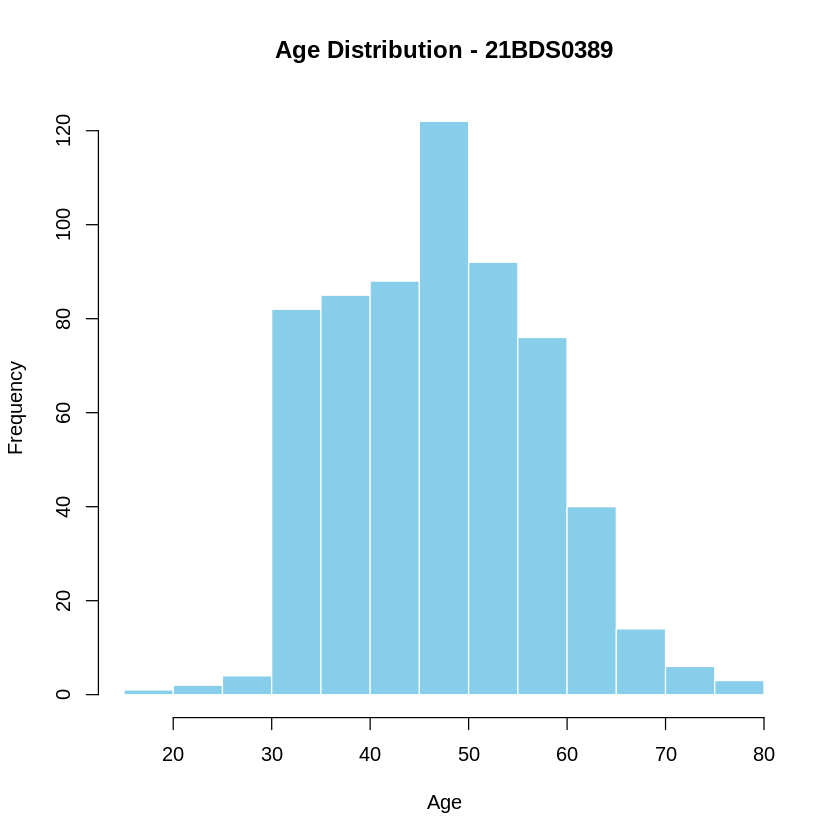

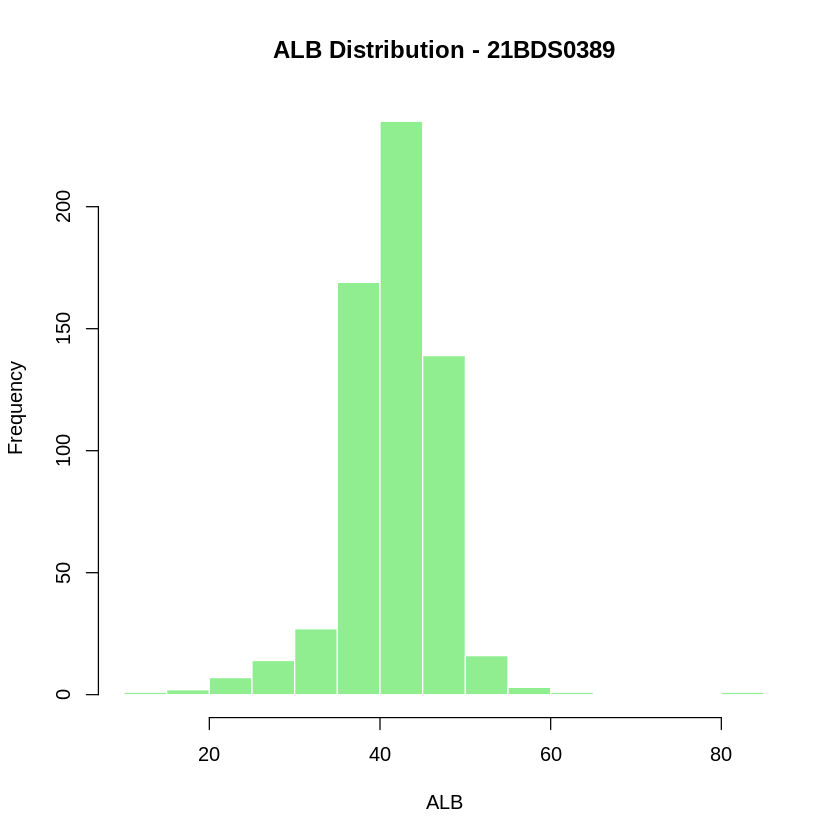

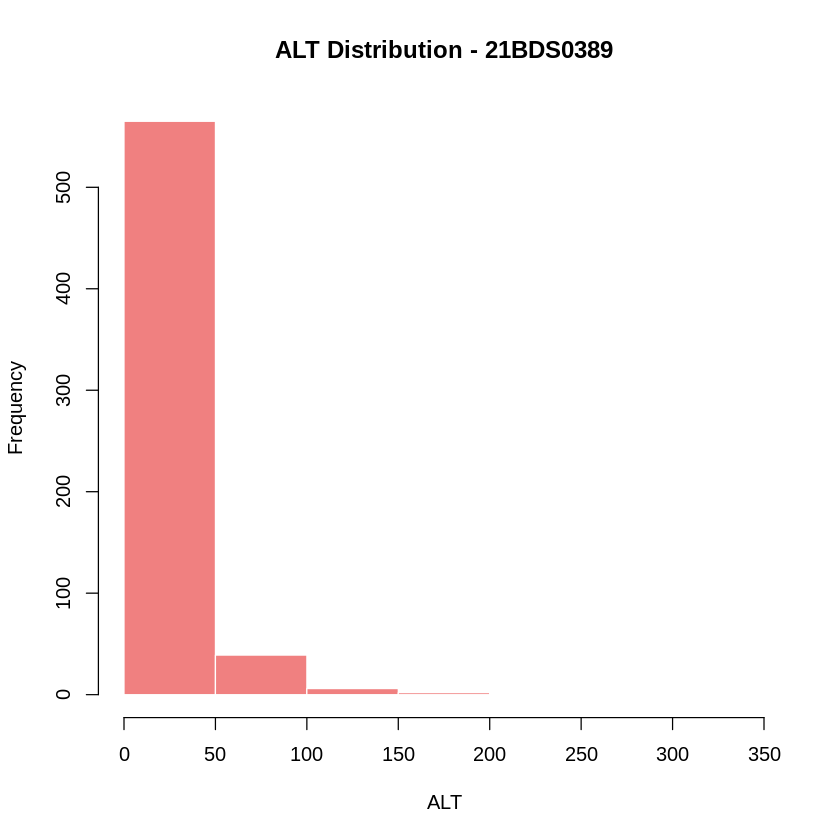

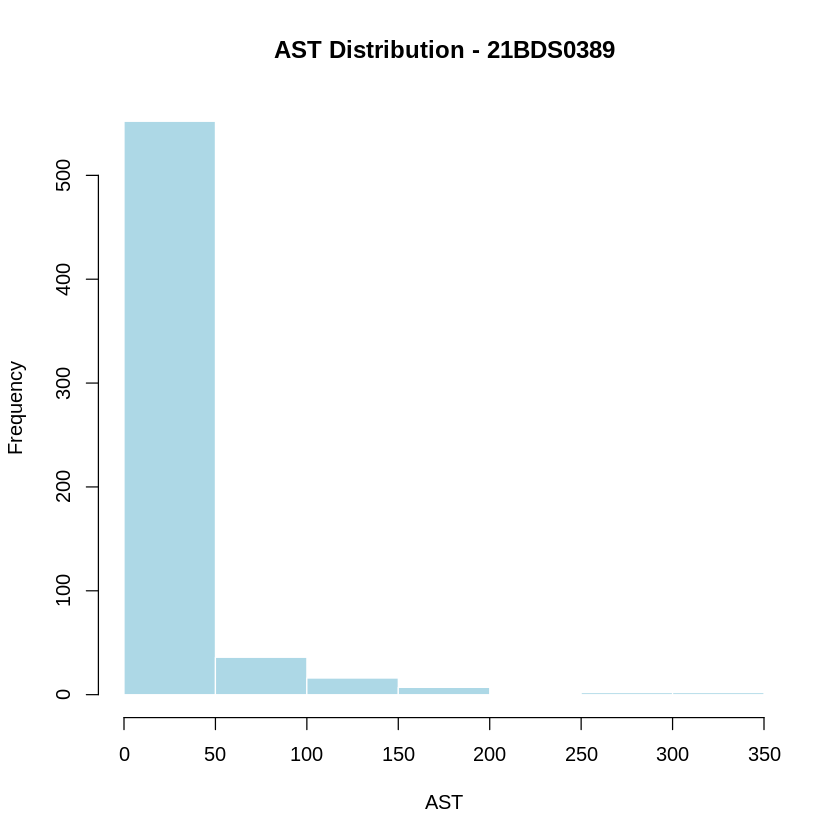

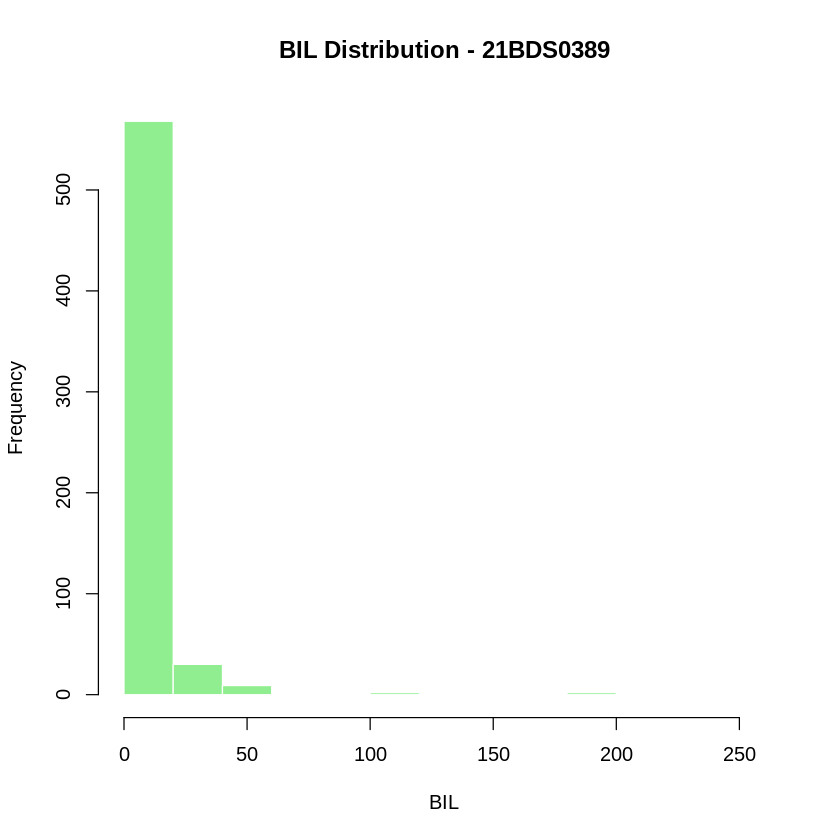

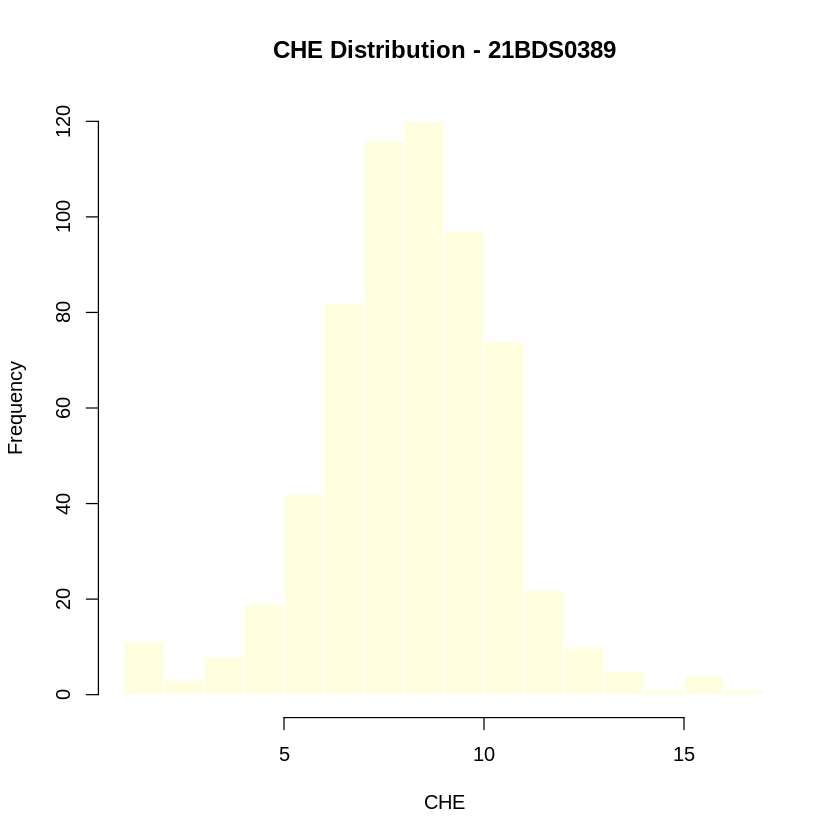

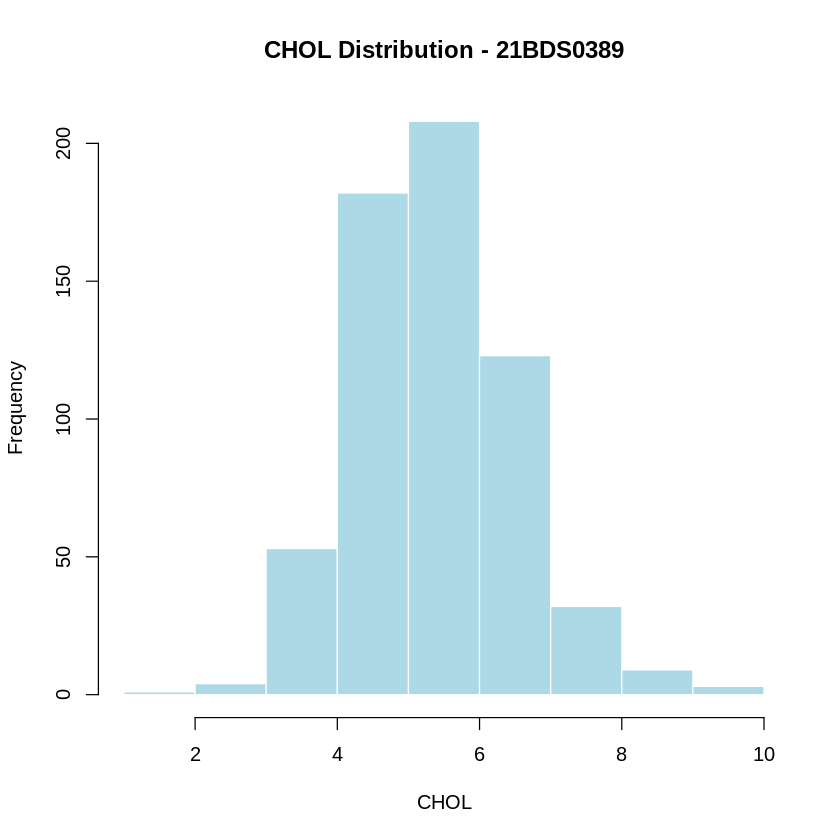

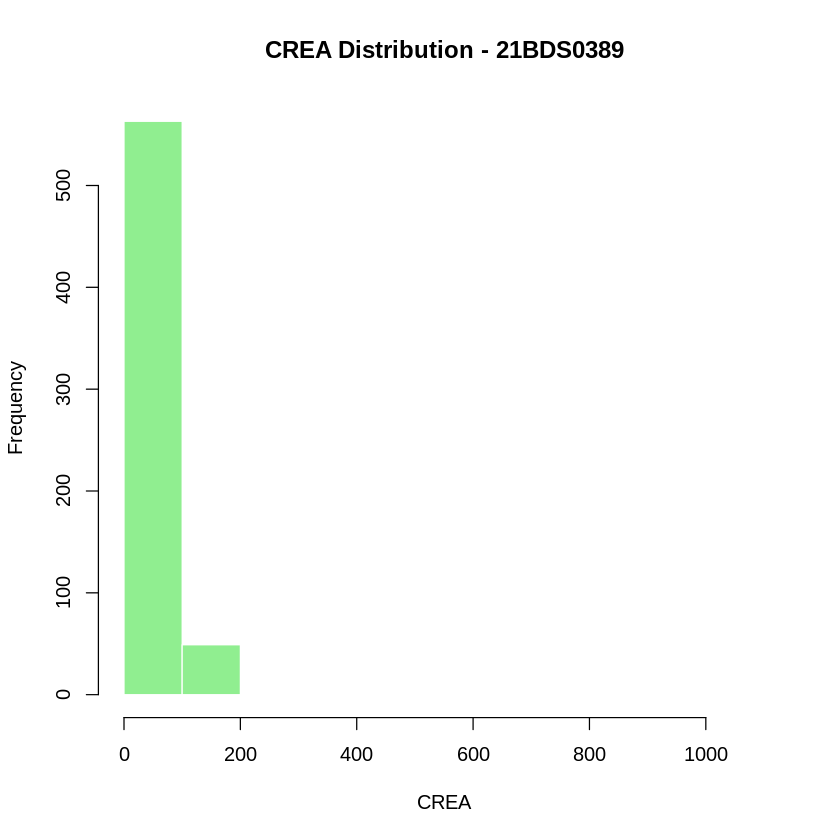

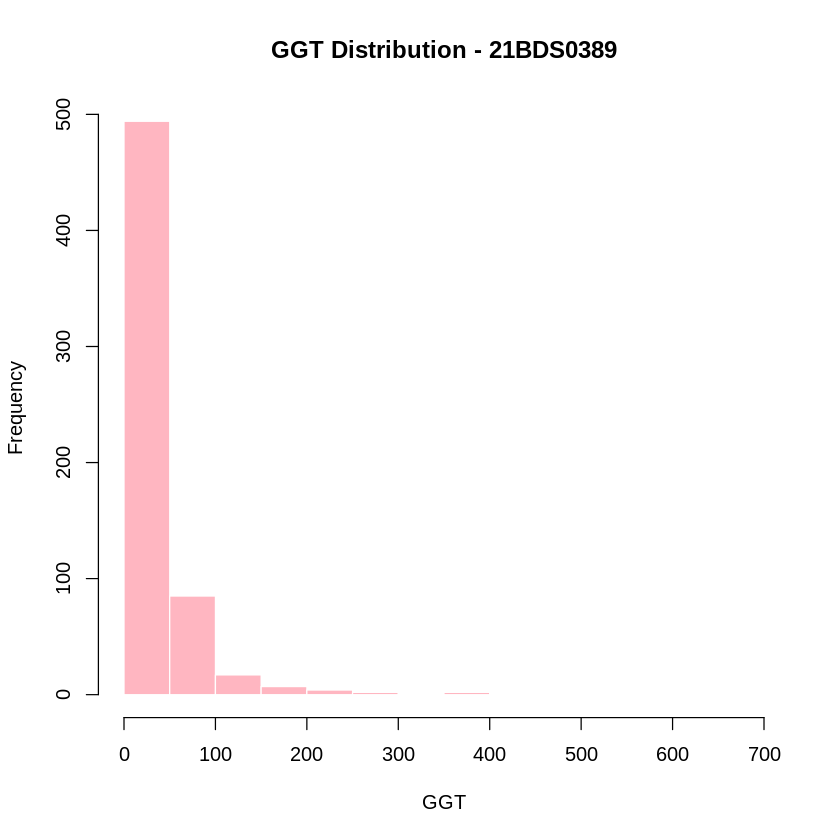

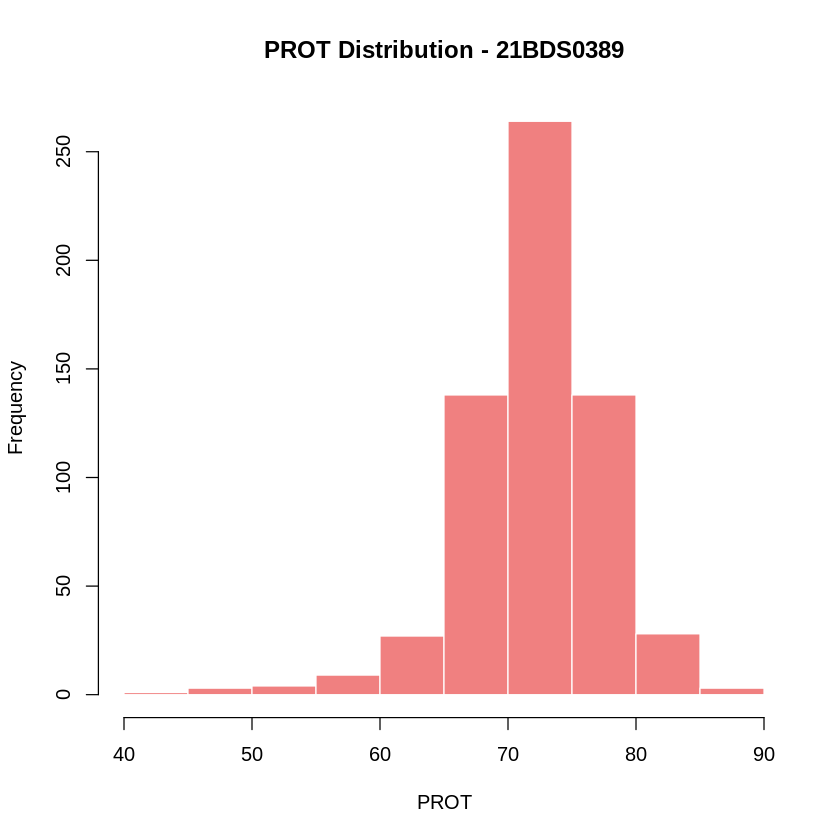

In [22]:
# Histogram for each numeric variable
hist(data_cleaned$Age, main="Age Distribution - 21BDS0389", xlab="Age", col="skyblue", border="white")
hist(data_cleaned$ALB, main="ALB Distribution - 21BDS0389", xlab="ALB", col="lightgreen", border="white")
hist(data_cleaned$ALT, main="ALT Distribution - 21BDS0389", xlab="ALT", col="lightcoral", border="white")
hist(data_cleaned$AST, main="AST Distribution - 21BDS0389", xlab="AST", col="lightblue", border="white")
hist(data_cleaned$BIL, main="BIL Distribution - 21BDS0389", xlab="BIL", col="lightgreen", border="white")
hist(data_cleaned$CHE, main="CHE Distribution - 21BDS0389", xlab="CHE", col="lightyellow", border="white")
hist(data_cleaned$CHOL, main="CHOL Distribution - 21BDS0389", xlab="CHOL", col="lightblue", border="white")
hist(data_cleaned$CREA, main="CREA Distribution - 21BDS0389", xlab="CREA", col="lightgreen", border="white")
hist(data_cleaned$GGT, main="GGT Distribution - 21BDS0389", xlab="GGT", col="lightpink", border="white")
hist(data_cleaned$PROT, main="PROT Distribution - 21BDS0389", xlab="PROT", col="lightcoral", border="white")

##### Boxplots for All Numeric Variables

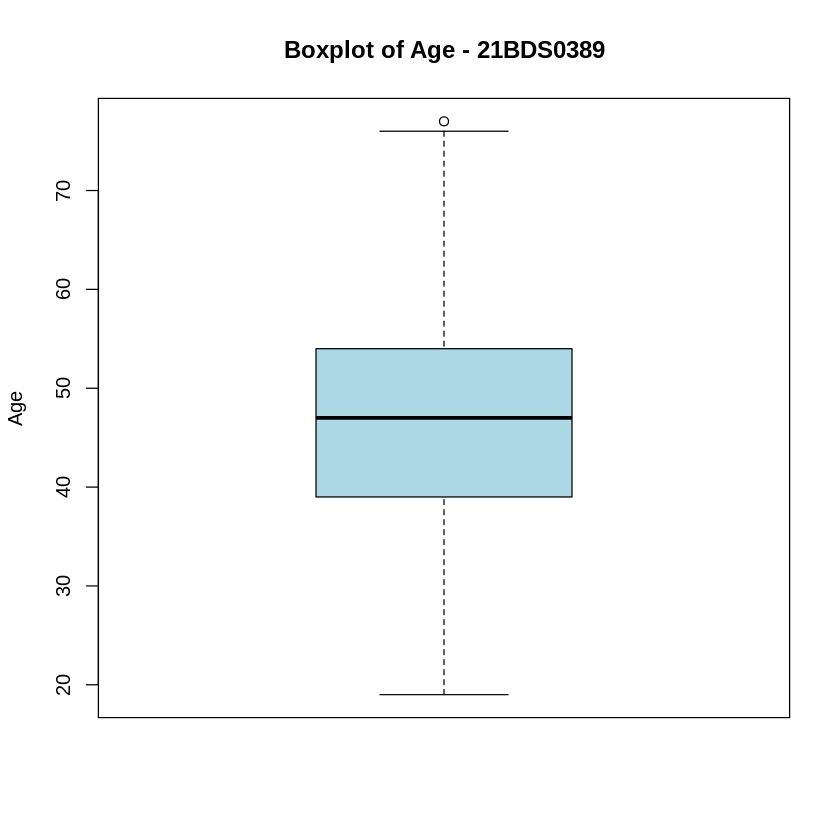

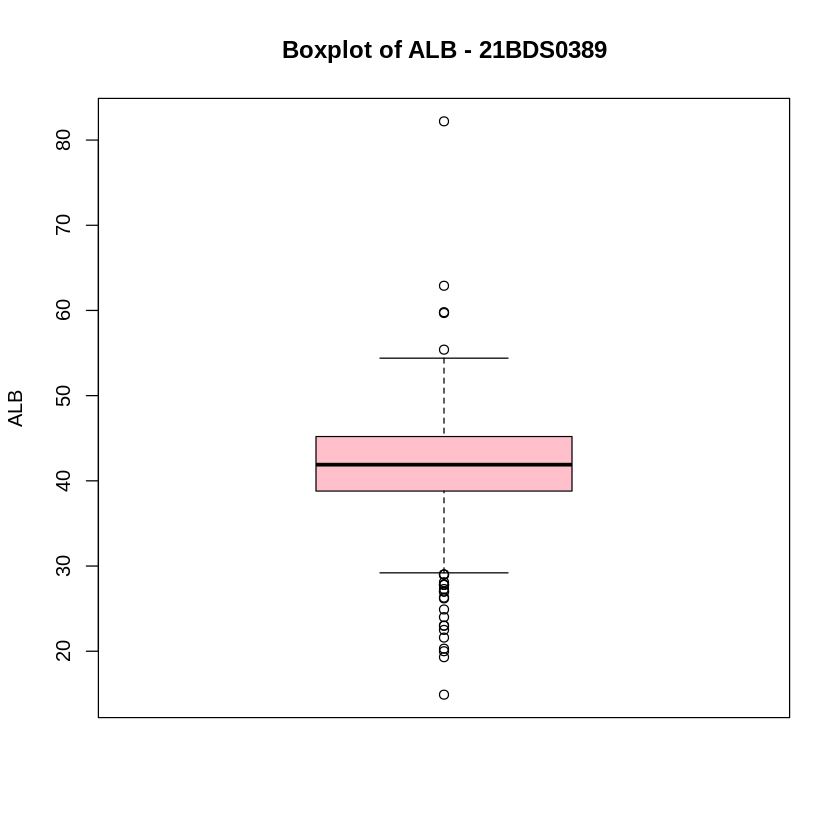

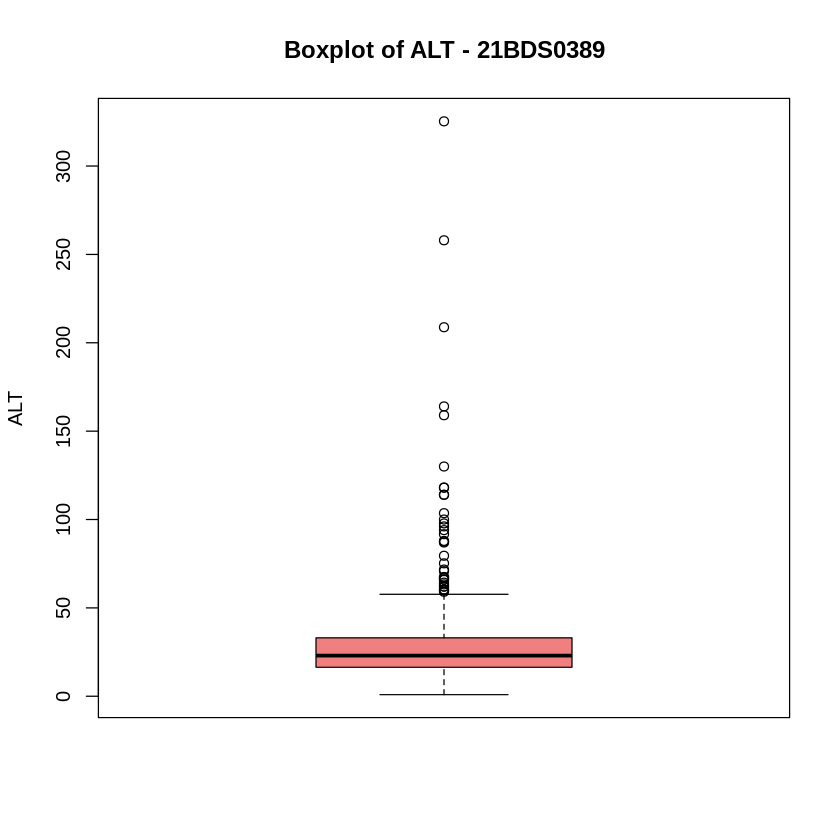

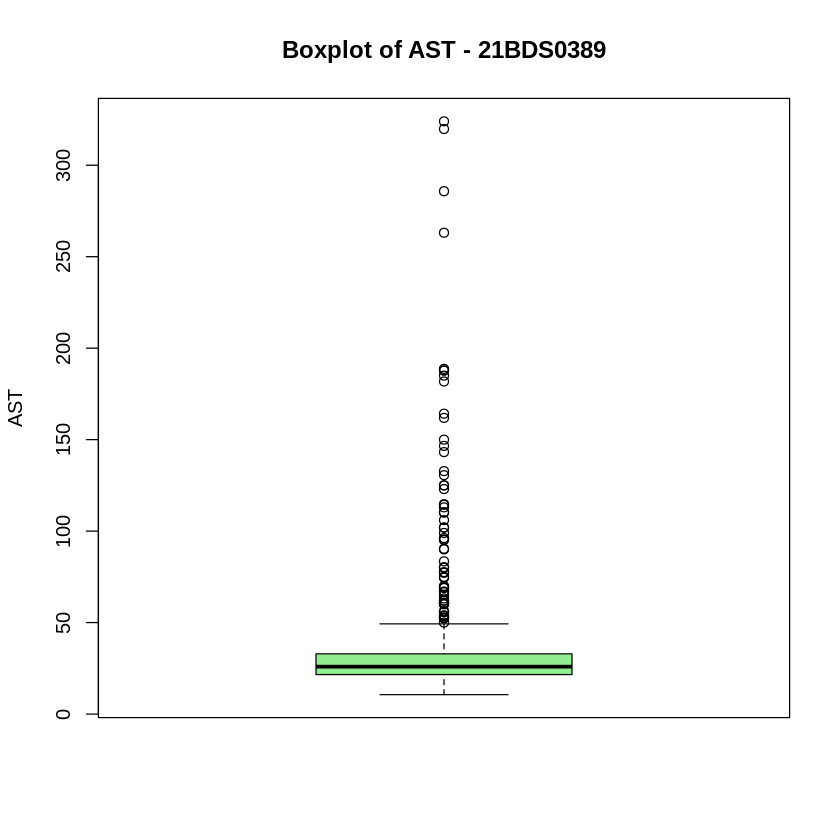

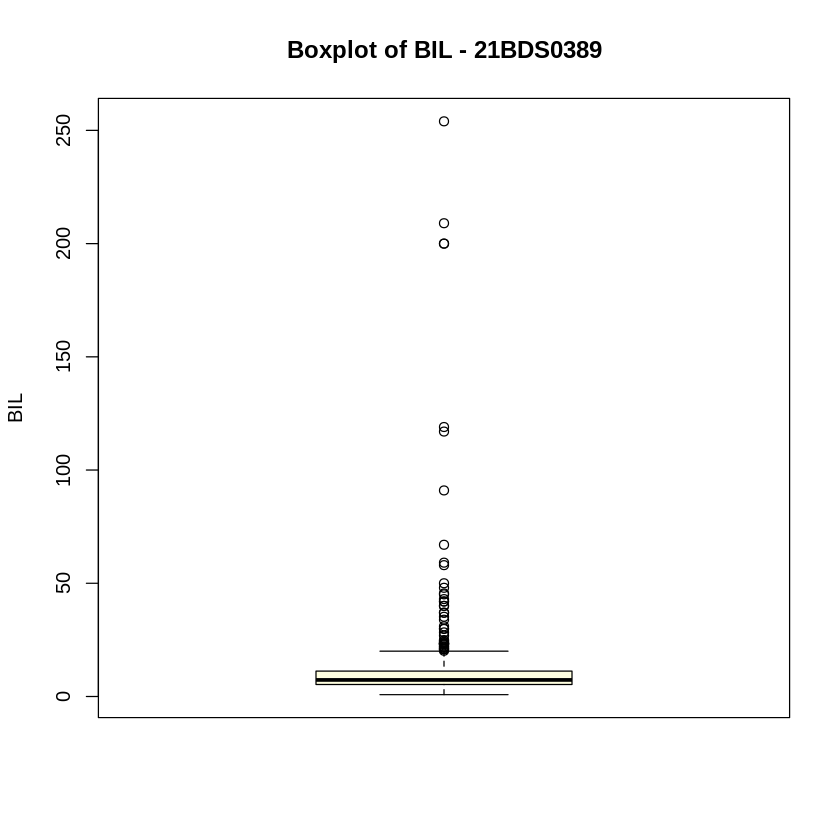

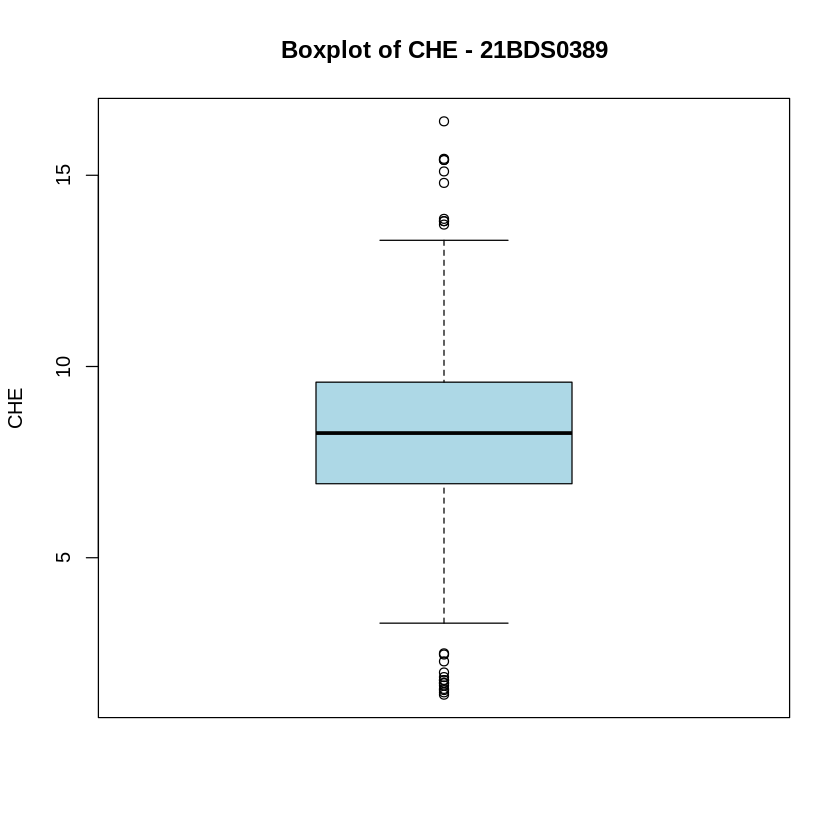

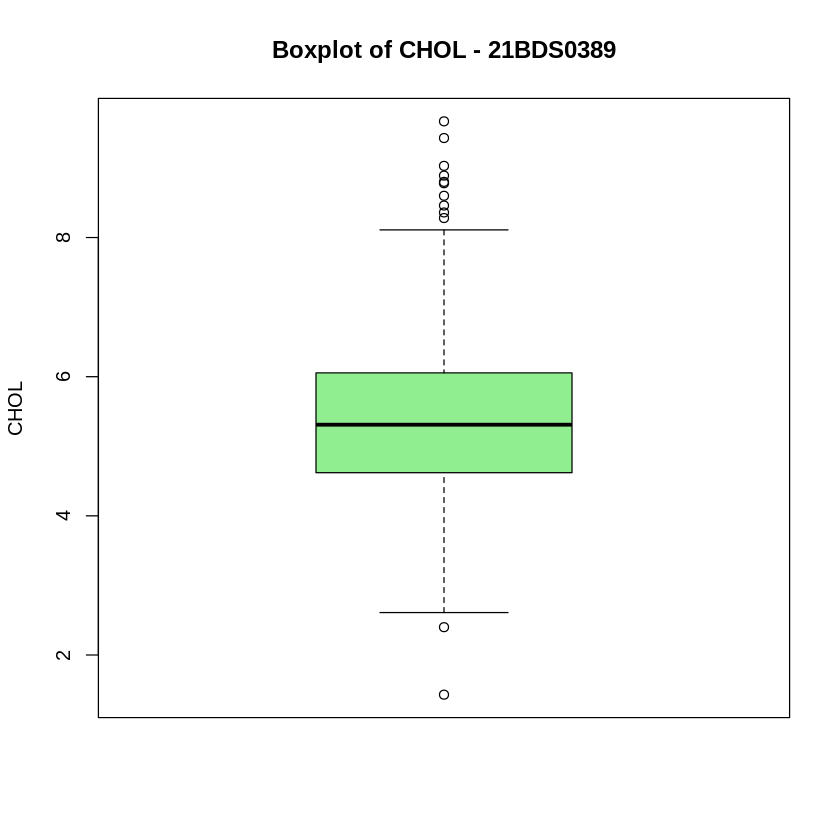

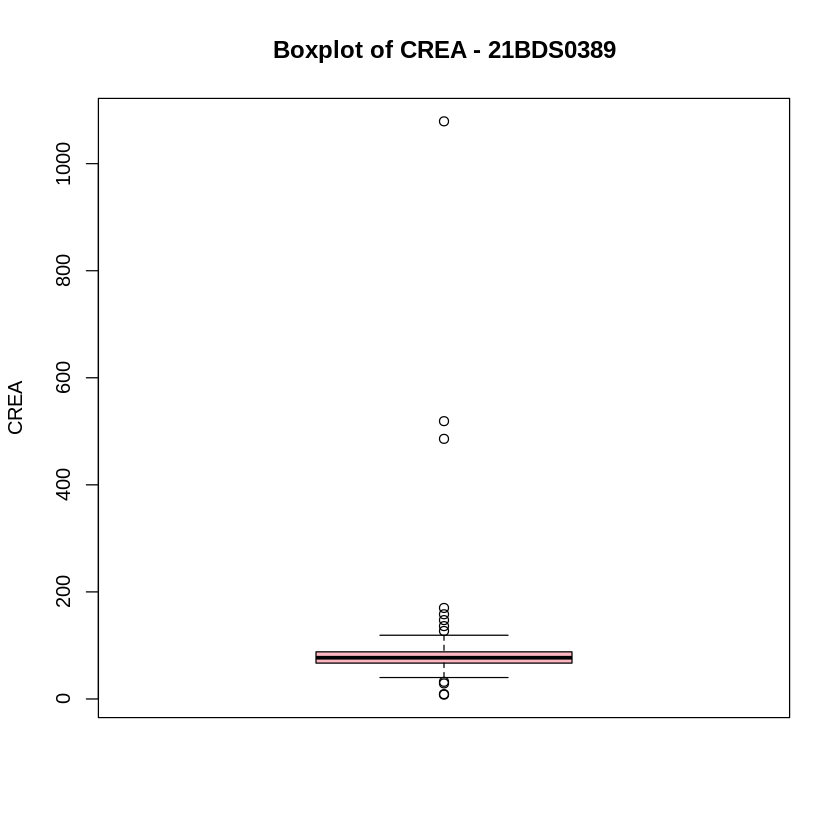

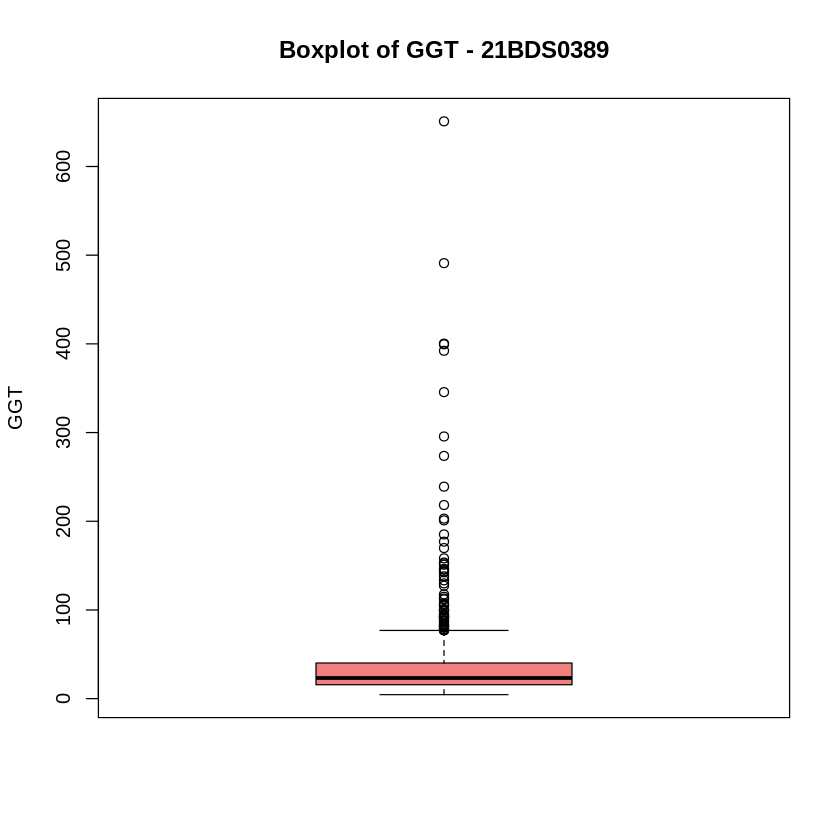

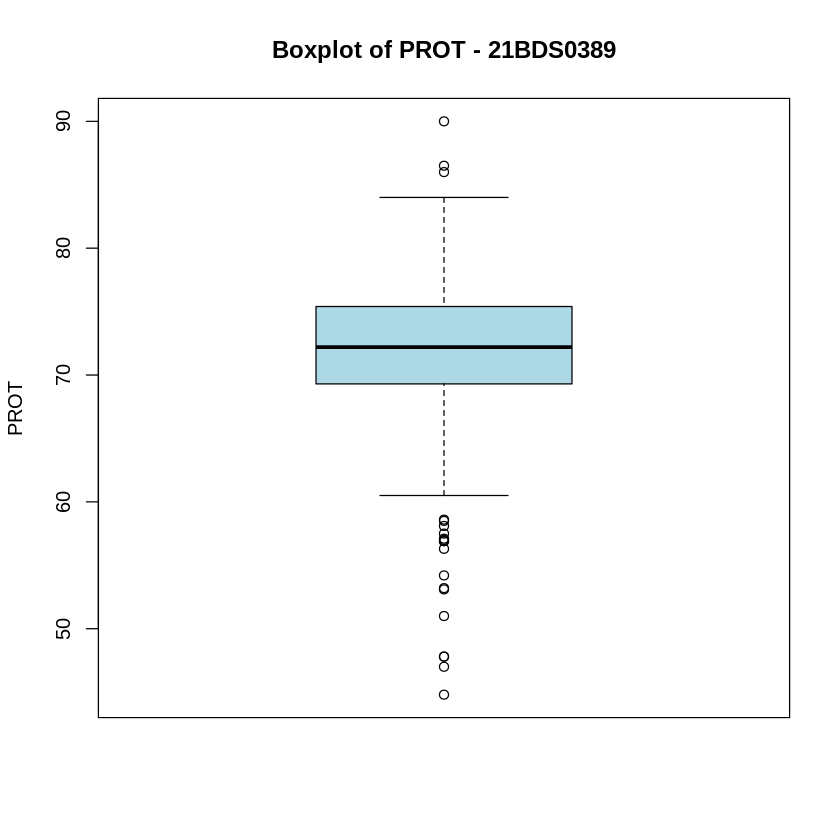

In [23]:
# Boxplot for each numeric variable
boxplot(data_cleaned$Age, main="Boxplot of Age - 21BDS0389", ylab="Age", col="lightblue")
boxplot(data_cleaned$ALB, main="Boxplot of ALB - 21BDS0389", ylab="ALB", col="pink")
boxplot(data_cleaned$ALT, main="Boxplot of ALT - 21BDS0389", ylab="ALT", col="lightcoral")
boxplot(data_cleaned$AST, main="Boxplot of AST - 21BDS0389", ylab="AST", col="lightgreen")
boxplot(data_cleaned$BIL, main="Boxplot of BIL - 21BDS0389", ylab="BIL", col="lightyellow")
boxplot(data_cleaned$CHE, main="Boxplot of CHE - 21BDS0389", ylab="CHE", col="lightblue")
boxplot(data_cleaned$CHOL, main="Boxplot of CHOL - 21BDS0389", ylab="CHOL", col="lightgreen")
boxplot(data_cleaned$CREA, main="Boxplot of CREA - 21BDS0389", ylab="CREA", col="lightpink")
boxplot(data_cleaned$GGT, main="Boxplot of GGT - 21BDS0389", ylab="GGT", col="lightcoral")
boxplot(data_cleaned$PROT, main="Boxplot of PROT - 21BDS0389", ylab="PROT", col="lightblue")

##### Univariate Visualizations for Categorical Variables

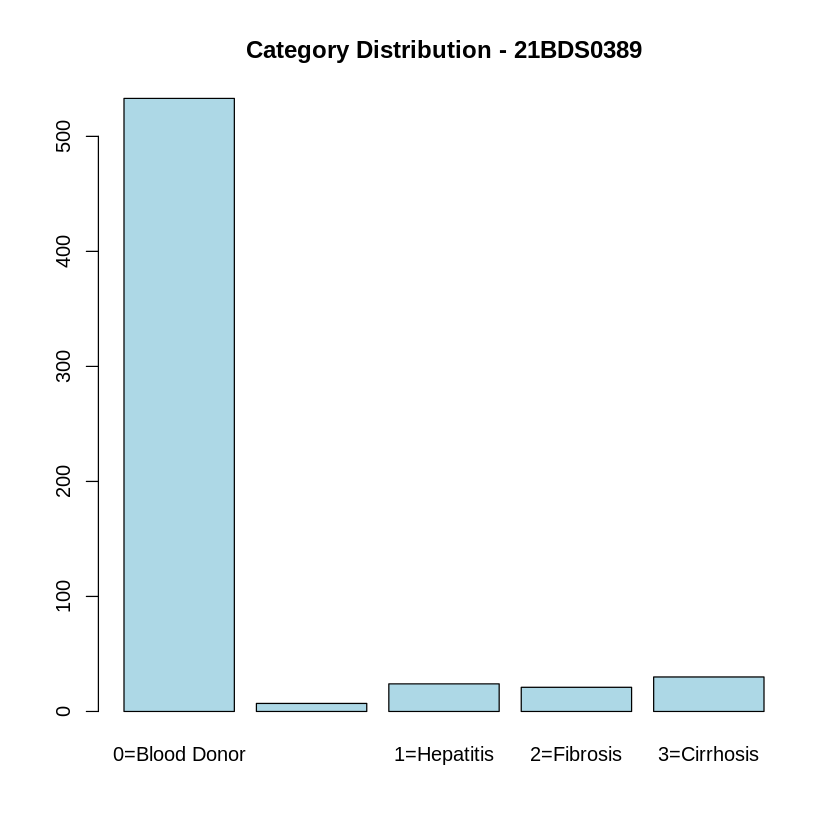

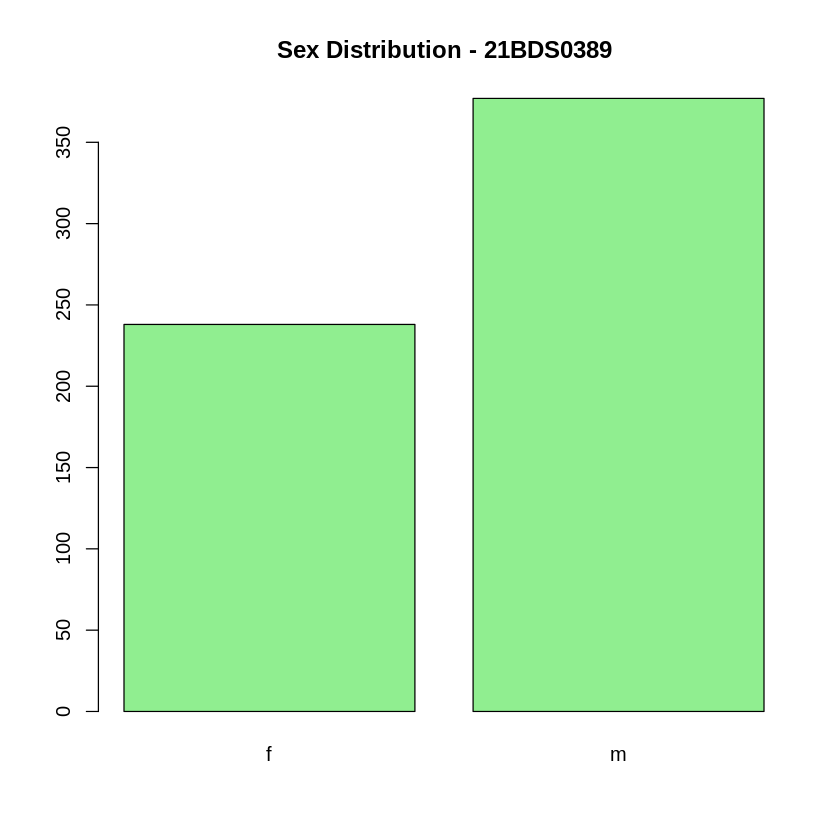

In [25]:
# Bar plot for categorical variables (Category and Sex)
barplot(table(data_cleaned$Category), main="Category Distribution - 21BDS0389", col="lightblue")
barplot(table(data_cleaned$Sex), main="Sex Distribution - 21BDS0389", col="lightgreen")

### Bivariate Analysis

##### Correlation Matrix for All Numeric Pairs

In [26]:
# Correlation matrix for all numeric variables
cor_matrix <- cor(numeric_data, use="complete.obs")
print(cor_matrix)

               X          Age          ALB         ALP          ALT         AST
X     1.00000000  0.420476961 -0.309379192  0.02240234 -0.034995518  0.33262600
Age   0.42047696  1.000000000 -0.197004739  0.16847333 -0.006016589  0.08866590
ALB  -0.30937919 -0.197004739  1.000000000 -0.13885824  0.001606337 -0.19339677
ALP   0.02240234  0.168473332 -0.138858241  1.00000000  0.172461124  0.06220184
ALT  -0.03499552 -0.006016589  0.001606337  0.17246112  1.000000000  0.27332505
AST   0.33262600  0.088665897 -0.193396767  0.06220184  0.273325052  1.00000000
BIL   0.18145946  0.032491817 -0.221649636  0.04859973 -0.038467799  0.31223141
CHE  -0.27054948 -0.075093477  0.375847806  0.03297145  0.146952934 -0.20853580
CHOL -0.08570882  0.123978014  0.204803112  0.12191446  0.068023456 -0.20750737
CREA -0.02598662 -0.022296365 -0.001573178  0.14955433 -0.043024952 -0.02138721
GGT   0.24778086  0.153086840 -0.155555161  0.44226240  0.248085550  0.49126255
PROT -0.11373487 -0.153665150  0.5500329

##### Scatter Plots for All Numeric Pairs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cards’, ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



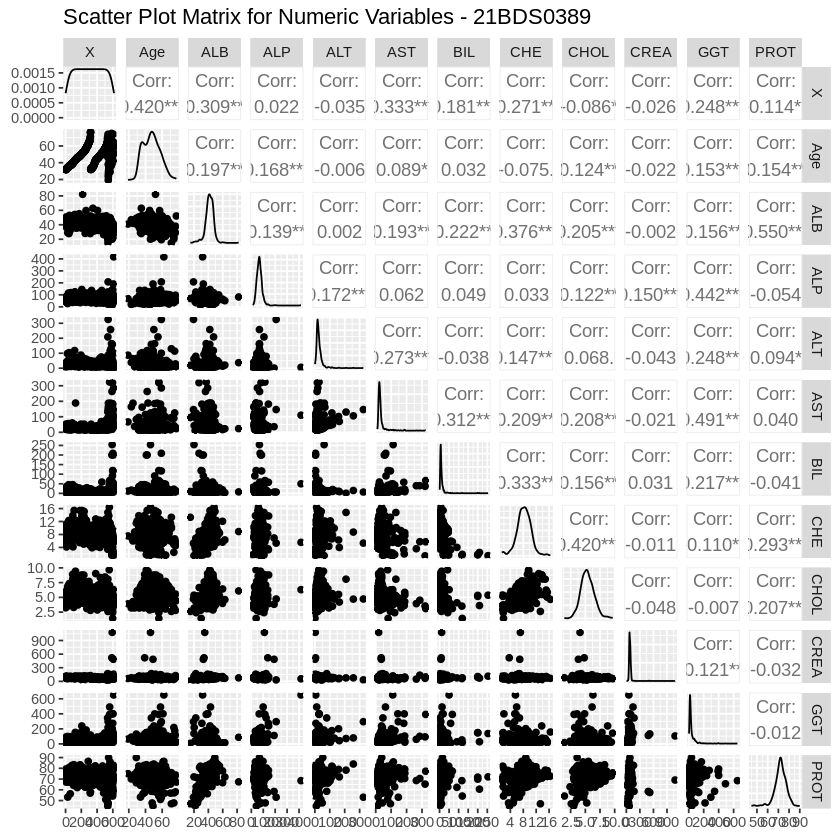

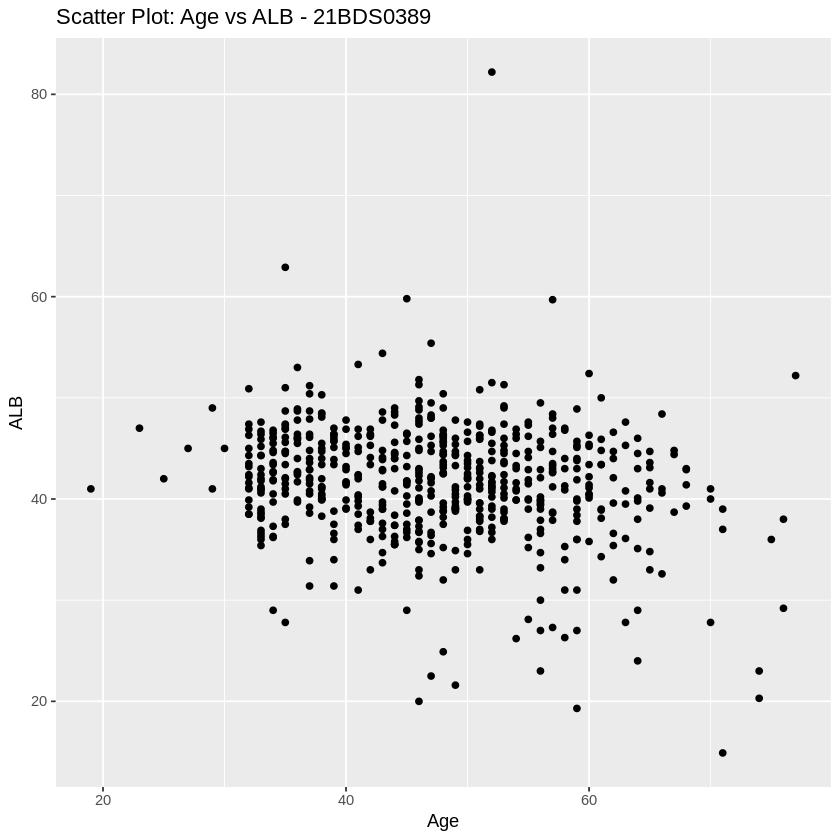

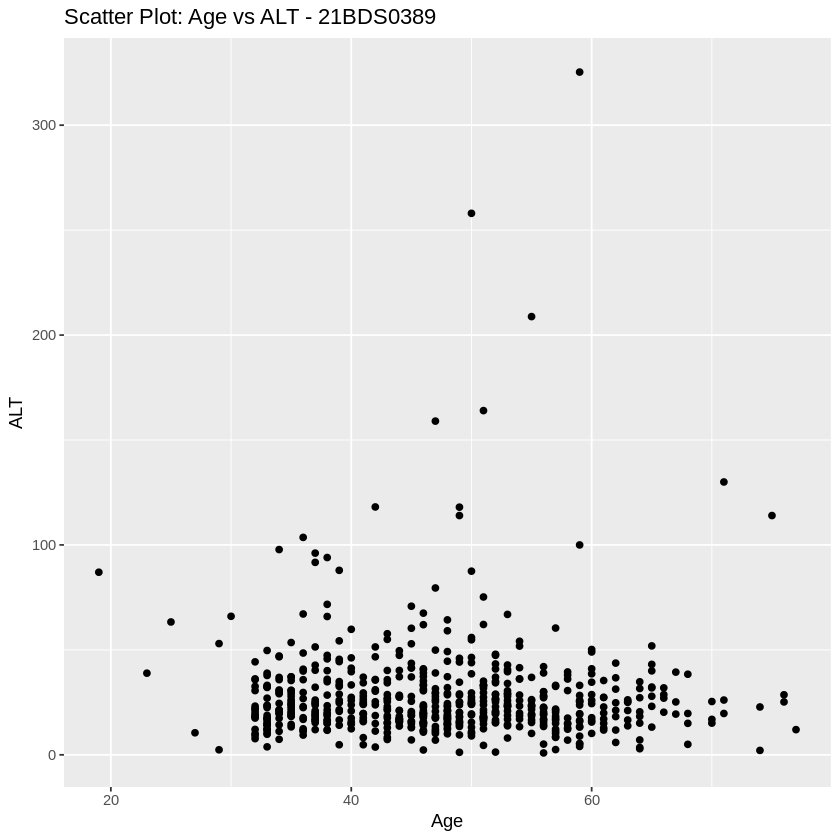

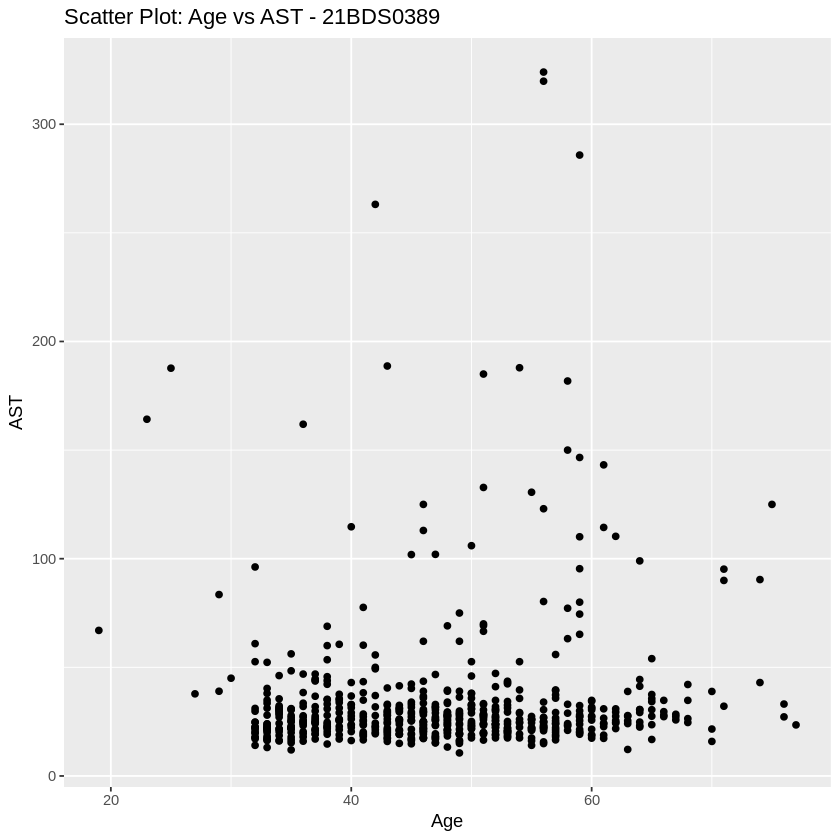

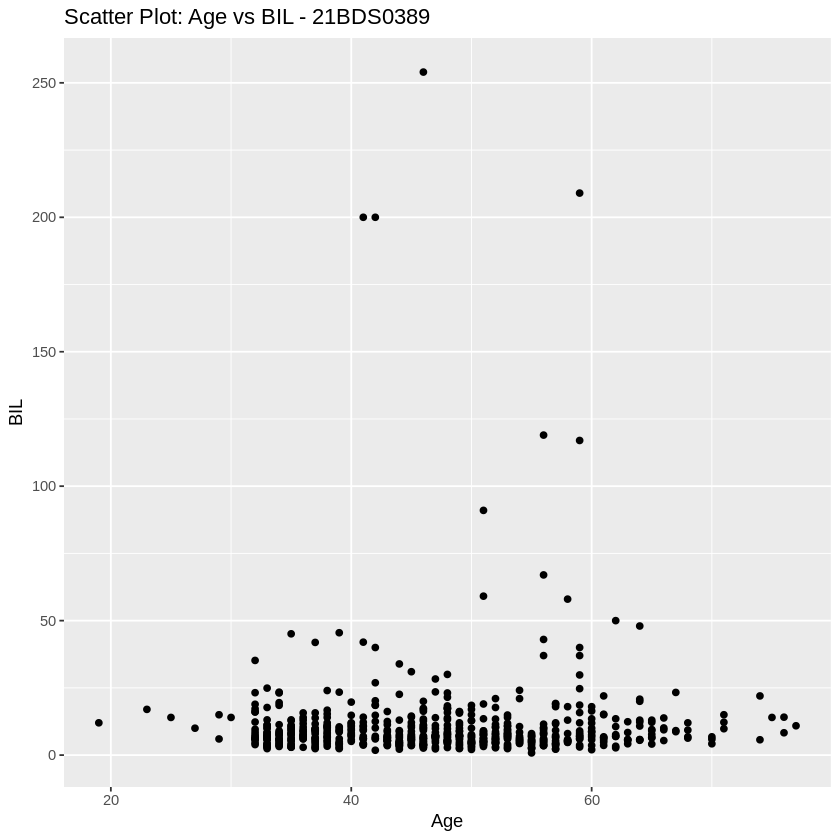

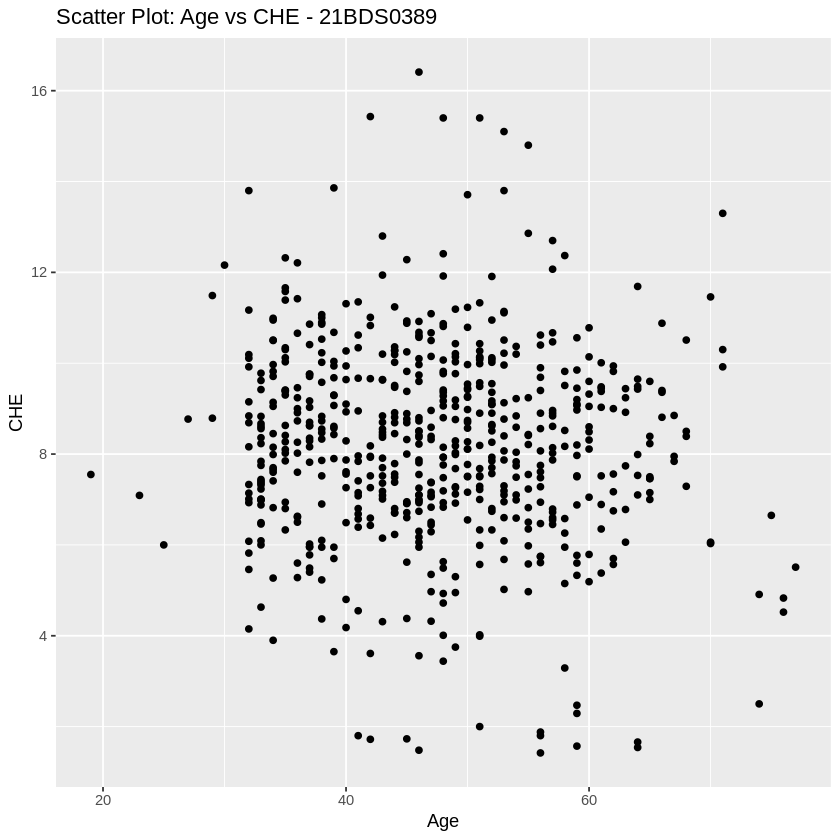

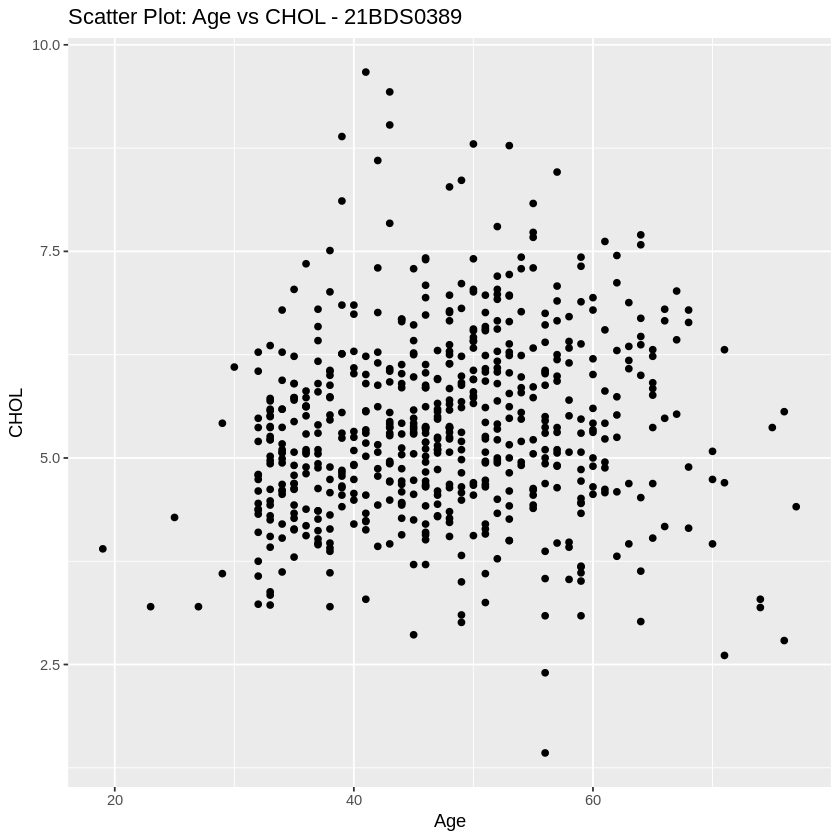

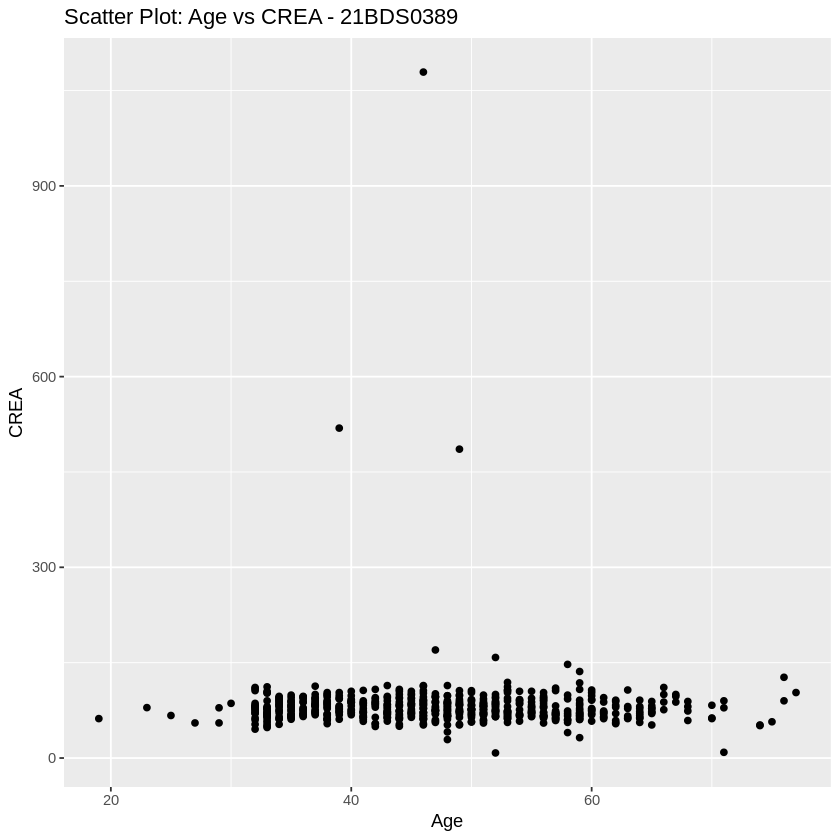

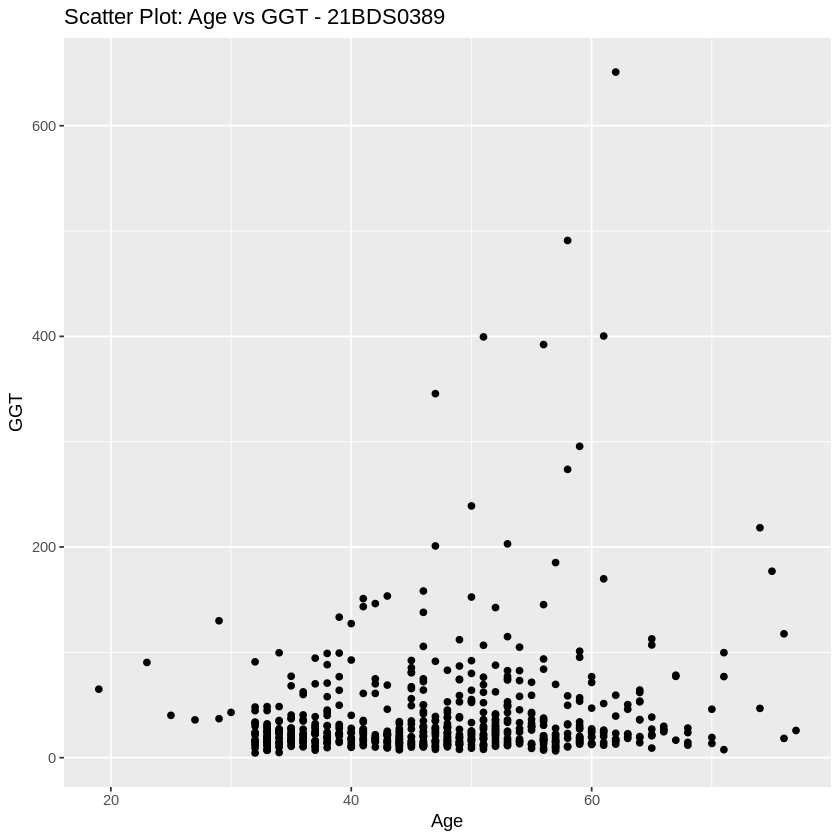

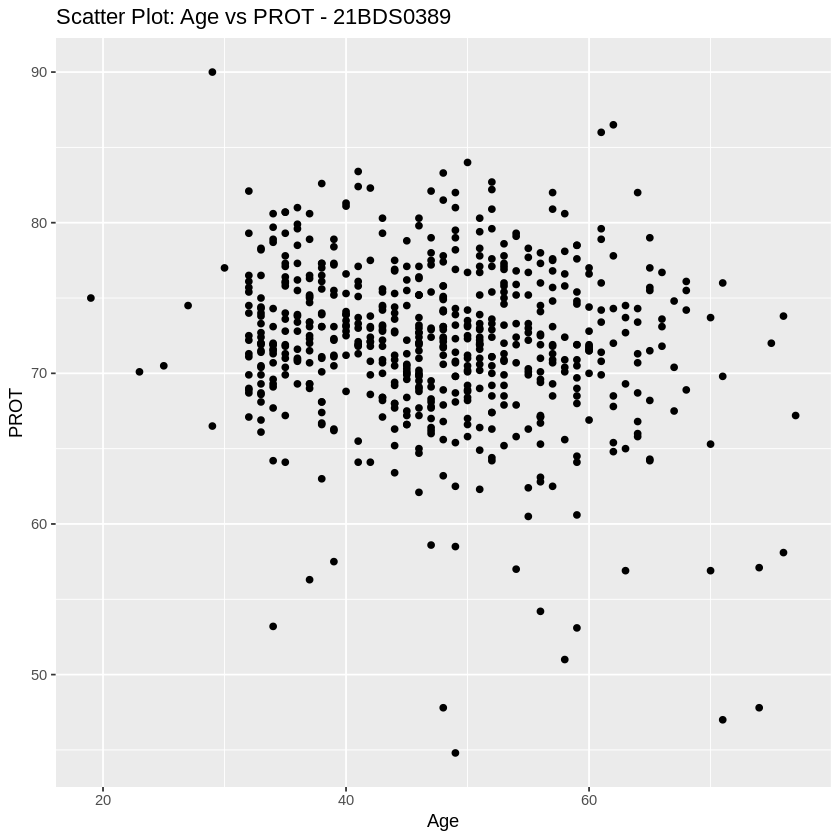

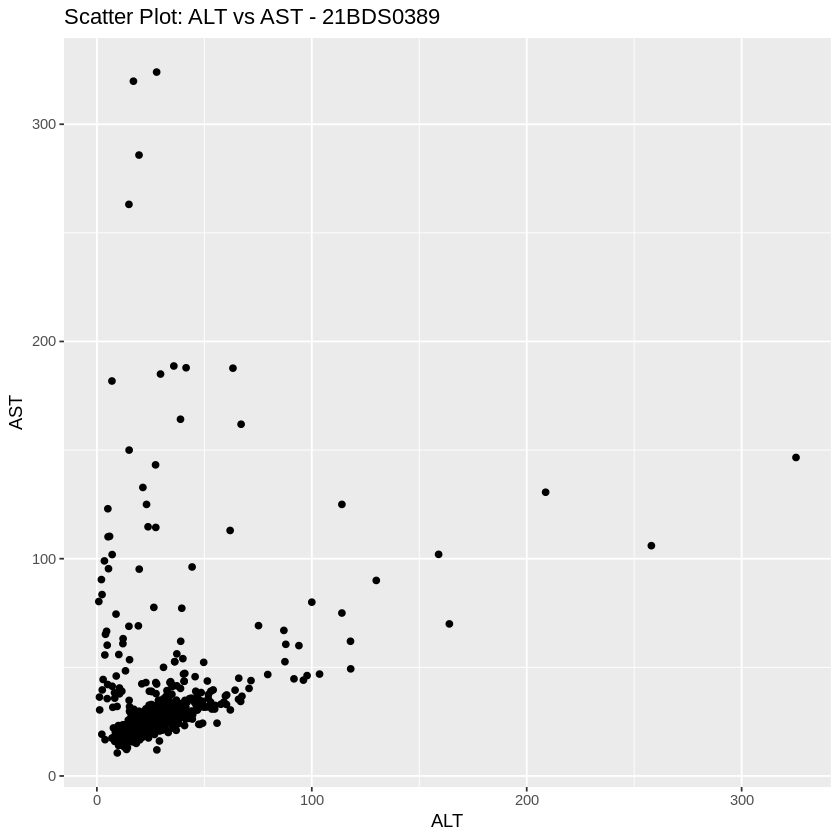

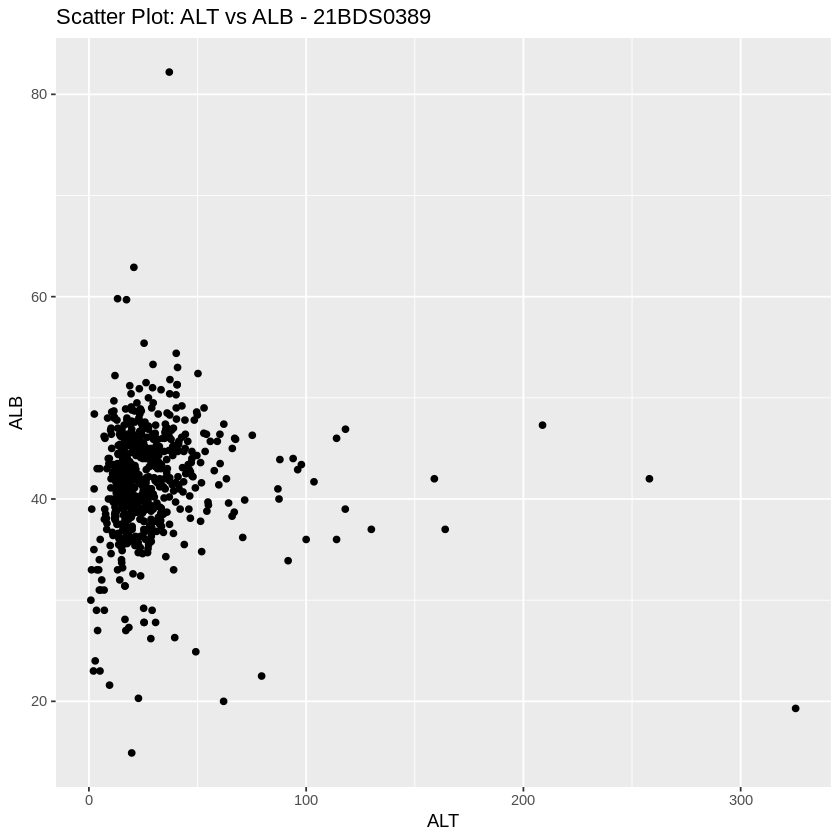

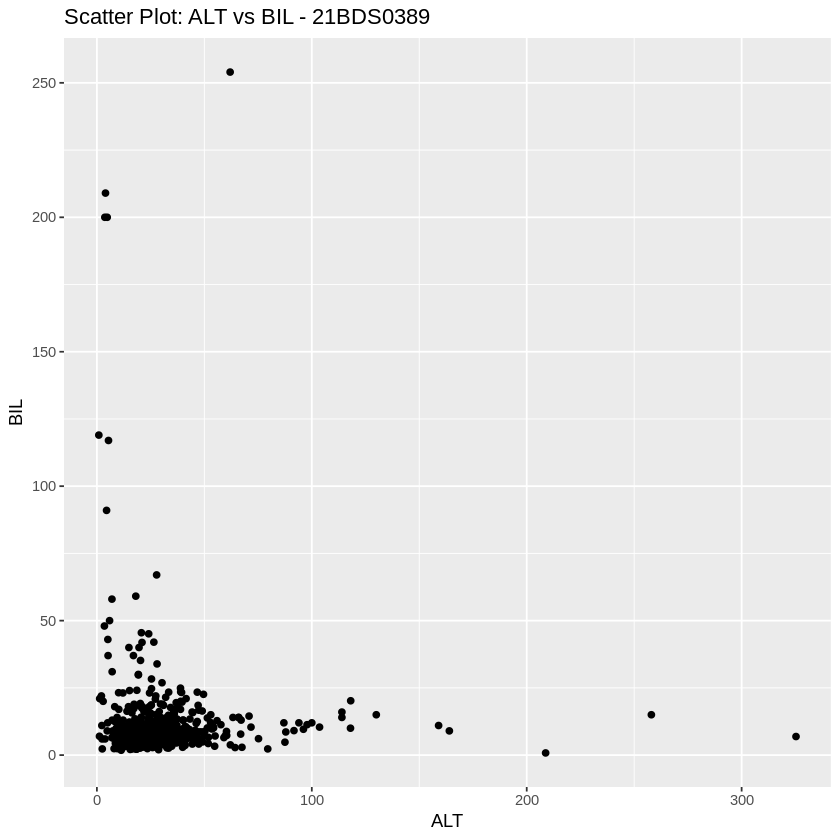

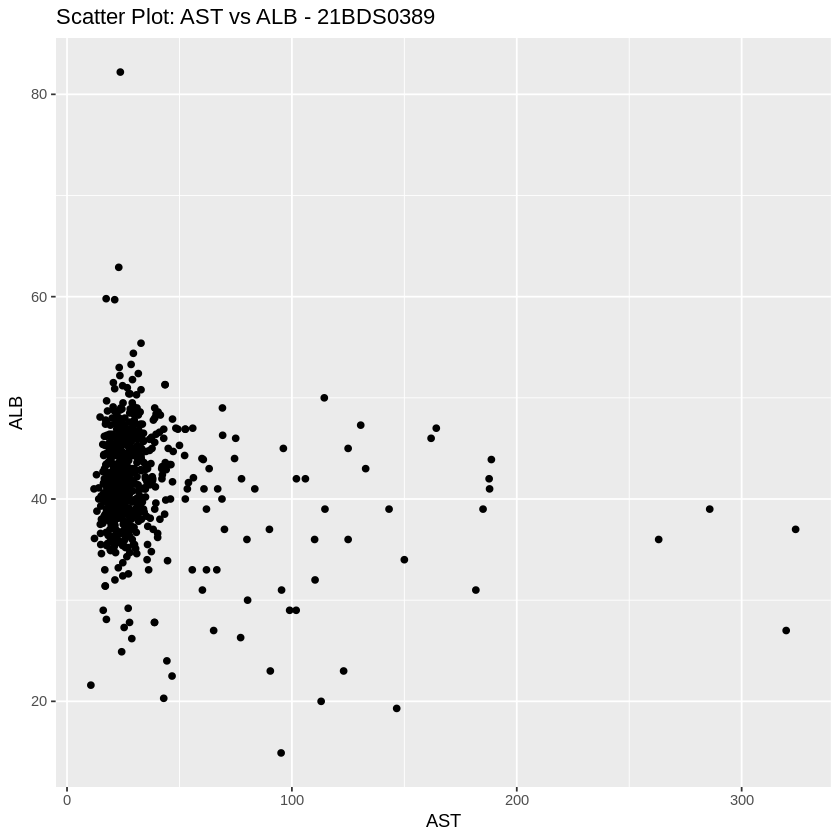

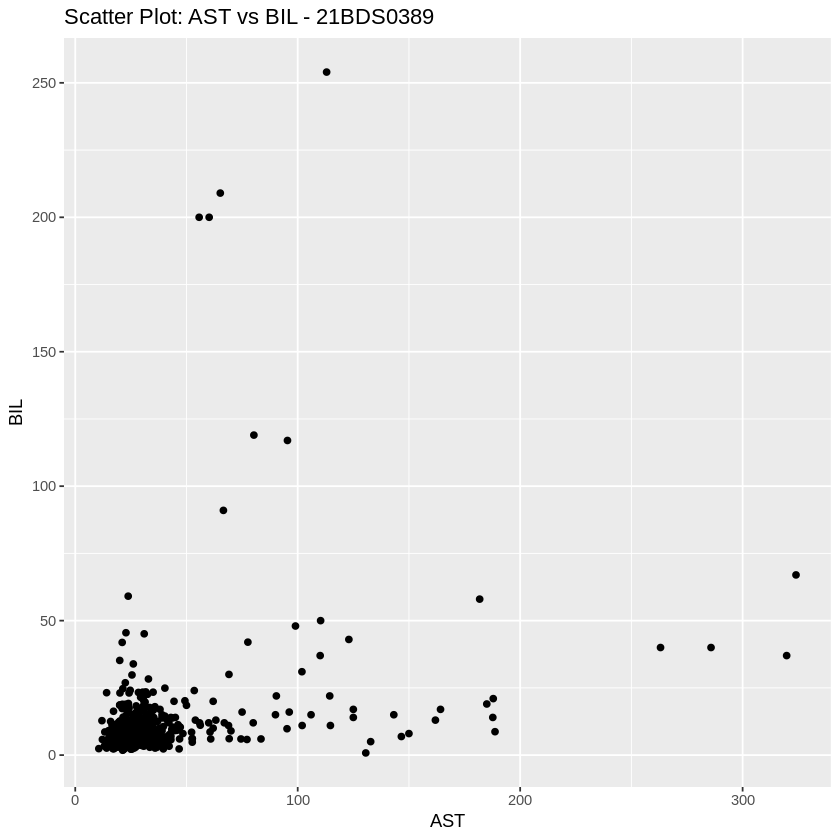

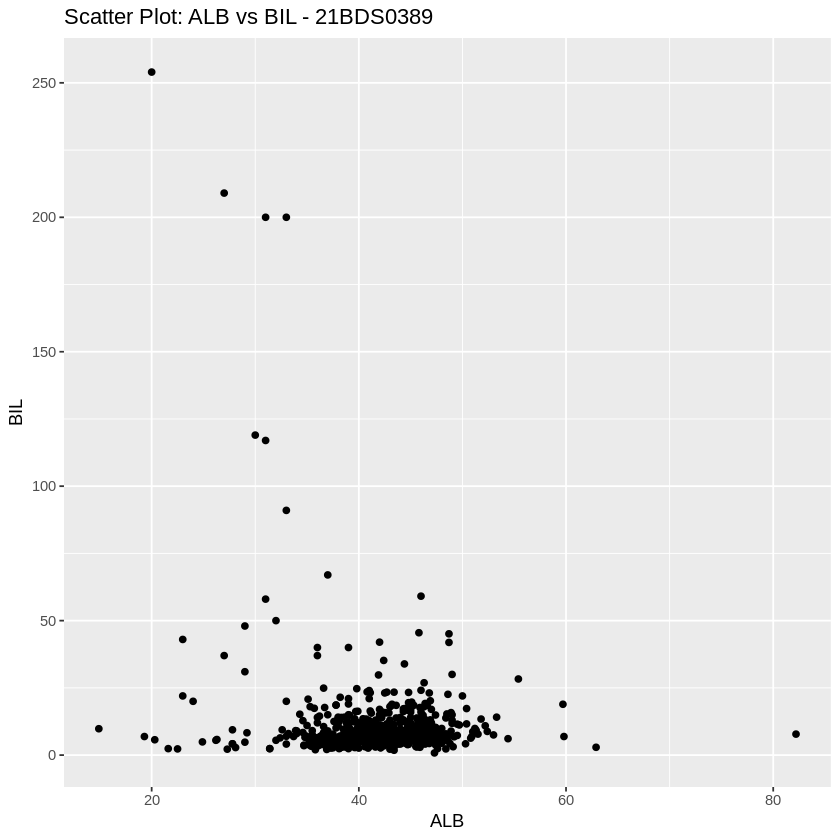

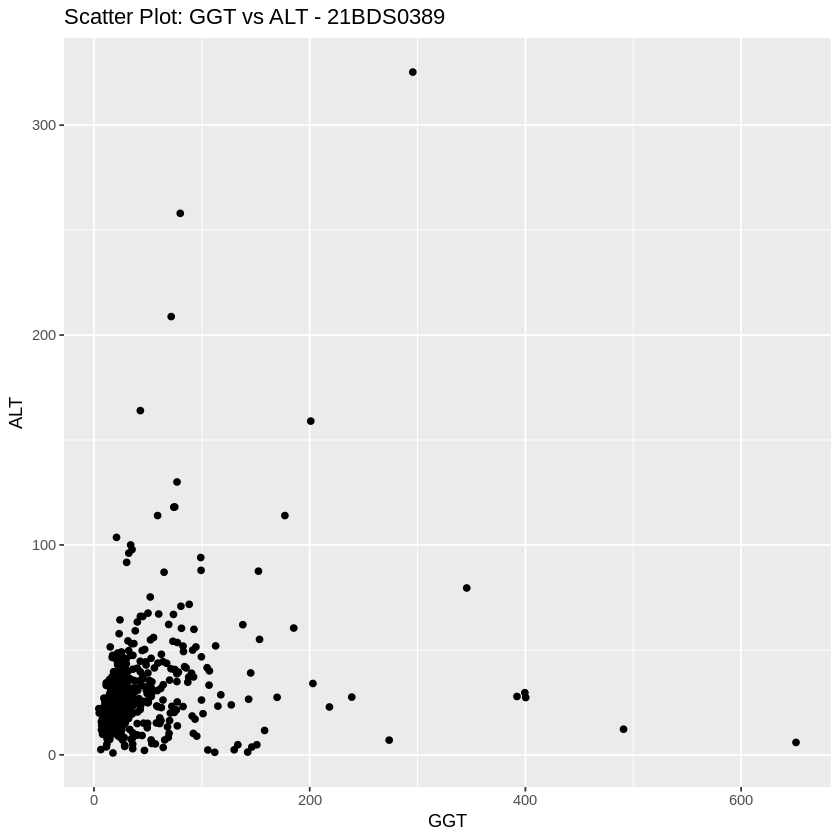

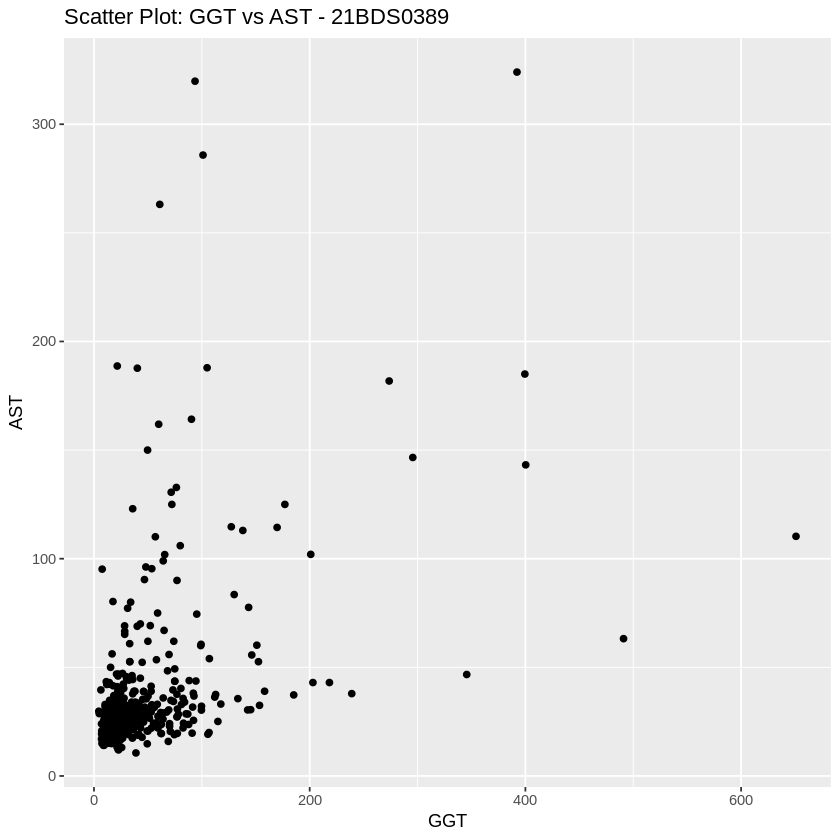

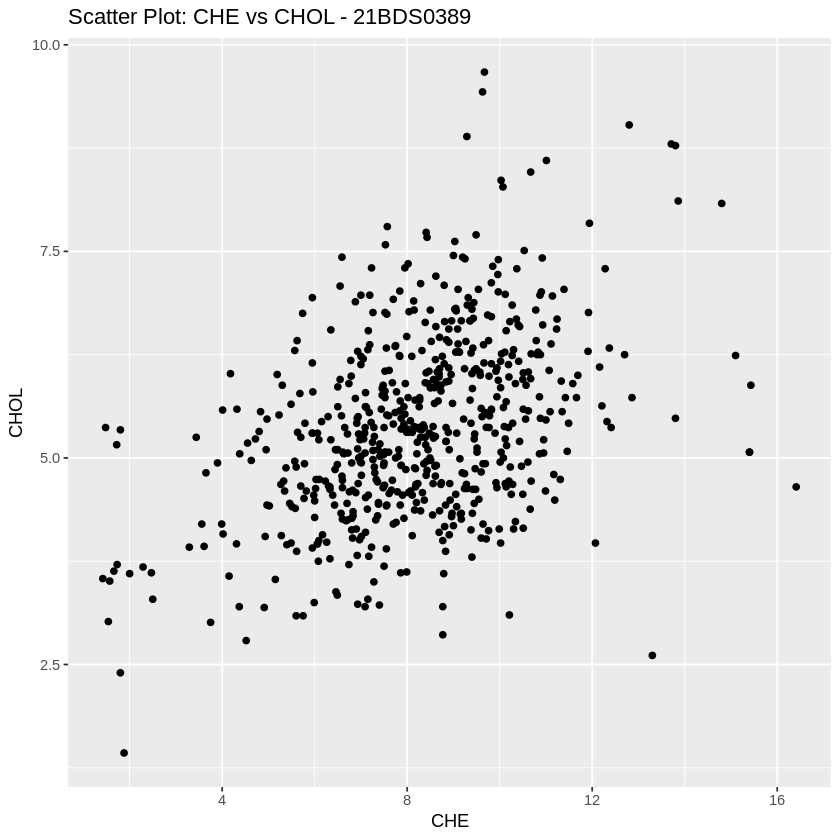

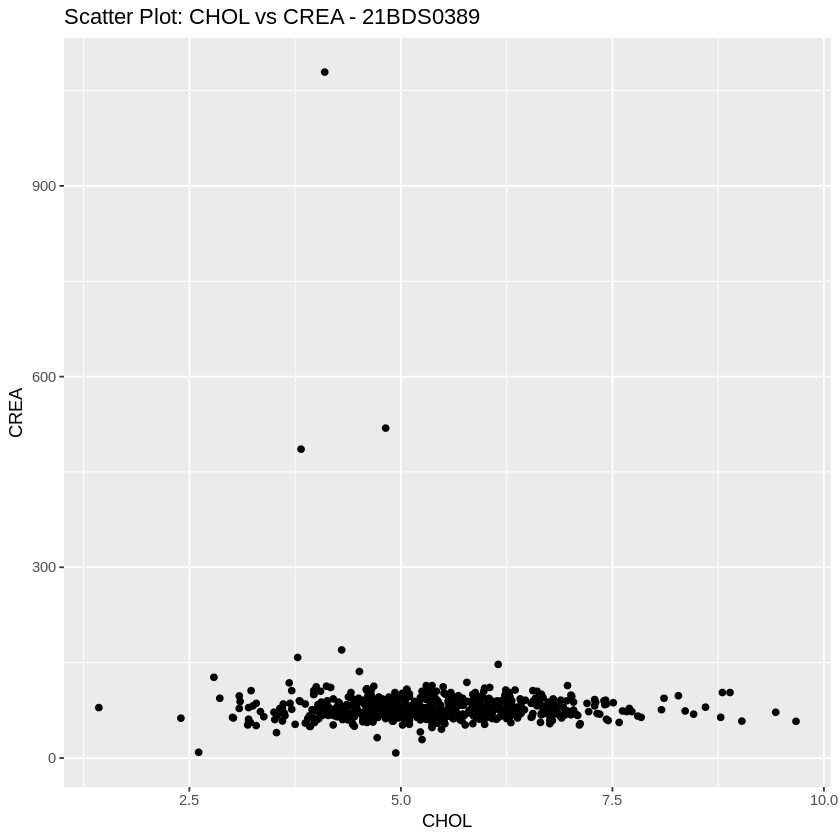

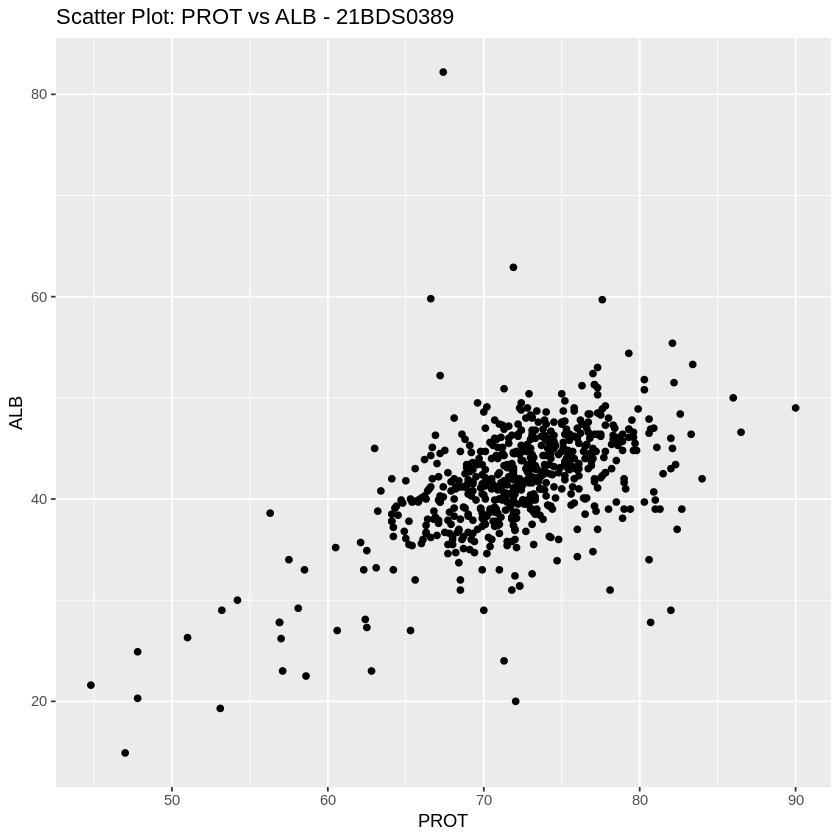

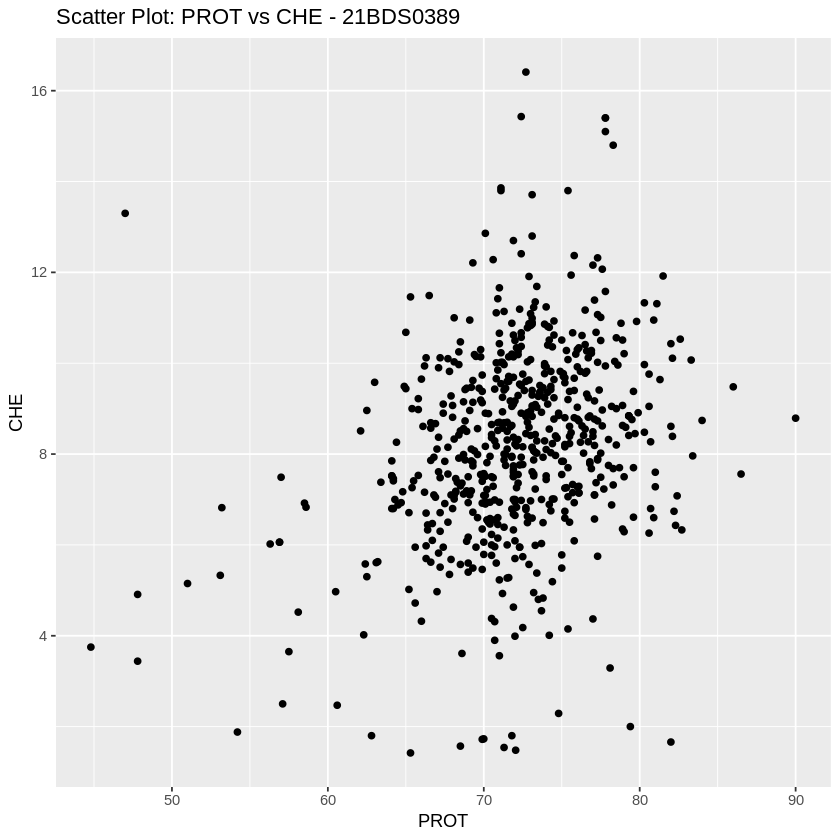

In [28]:
install.packages("GGally")
library(GGally)

# Scatter plot matrix to visualize pairwise relationships
ggpairs(numeric_data, title = "Scatter Plot Matrix for Numeric Variables - 21BDS0389")

# Scatter Plot: Age vs ALB
ggplot(data_cleaned, aes(x=Age, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs ALB - 21BDS0389")

# Scatter Plot: Age vs ALT
ggplot(data_cleaned, aes(x=Age, y=ALT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs ALT - 21BDS0389")

# Scatter Plot: Age vs AST
ggplot(data_cleaned, aes(x=Age, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs AST - 21BDS0389")

# Scatter Plot: Age vs BIL
ggplot(data_cleaned, aes(x=Age, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs BIL - 21BDS0389")

# Scatter Plot: Age vs CHE
ggplot(data_cleaned, aes(x=Age, y=CHE)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CHE - 21BDS0389")

# Scatter Plot: Age vs CHOL
ggplot(data_cleaned, aes(x=Age, y=CHOL)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CHOL - 21BDS0389")

# Scatter Plot: Age vs CREA
ggplot(data_cleaned, aes(x=Age, y=CREA)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CREA - 21BDS0389")

# Scatter Plot: Age vs GGT
ggplot(data_cleaned, aes(x=Age, y=GGT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs GGT - 21BDS0389")

# Scatter Plot: Age vs PROT
ggplot(data_cleaned, aes(x=Age, y=PROT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs PROT - 21BDS0389")

# Scatter Plot: ALT vs AST
ggplot(data_cleaned, aes(x=ALT, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs AST - 21BDS0389")

# Scatter Plot: ALT vs ALB
ggplot(data_cleaned, aes(x=ALT, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs ALB - 21BDS0389")

# Scatter Plot: ALT vs BIL
ggplot(data_cleaned, aes(x=ALT, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs BIL - 21BDS0389")

# Scatter Plot: AST vs ALB
ggplot(data_cleaned, aes(x=AST, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: AST vs ALB - 21BDS0389")

# Scatter Plot: AST vs BIL
ggplot(data_cleaned, aes(x=AST, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: AST vs BIL - 21BDS0389")

# Scatter Plot: ALB vs BIL
ggplot(data_cleaned, aes(x=ALB, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: ALB vs BIL - 21BDS0389")

# Scatter Plot: GGT vs ALT
ggplot(data_cleaned, aes(x=GGT, y=ALT)) +
  geom_point() +
  ggtitle("Scatter Plot: GGT vs ALT - 21BDS0389")

# Scatter Plot: GGT vs AST
ggplot(data_cleaned, aes(x=GGT, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: GGT vs AST - 21BDS0389")

# Scatter Plot: CHE vs CHOL
ggplot(data_cleaned, aes(x=CHE, y=CHOL)) +
  geom_point() +
  ggtitle("Scatter Plot: CHE vs CHOL - 21BDS0389")

# Scatter Plot: CHOL vs CREA
ggplot(data_cleaned, aes(x=CHOL, y=CREA)) +
  geom_point() +
  ggtitle("Scatter Plot: CHOL vs CREA - 21BDS0389")

# Scatter Plot: PROT vs ALB
ggplot(data_cleaned, aes(x=PROT, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: PROT vs ALB - 21BDS0389")

# Scatter Plot: PROT vs CHE
ggplot(data_cleaned, aes(x=PROT, y=CHE)) +
  geom_point() +
  ggtitle("Scatter Plot: PROT vs CHE - 21BDS0389")


##### Categorical vs Numeric: Boxplots and Group Statistics

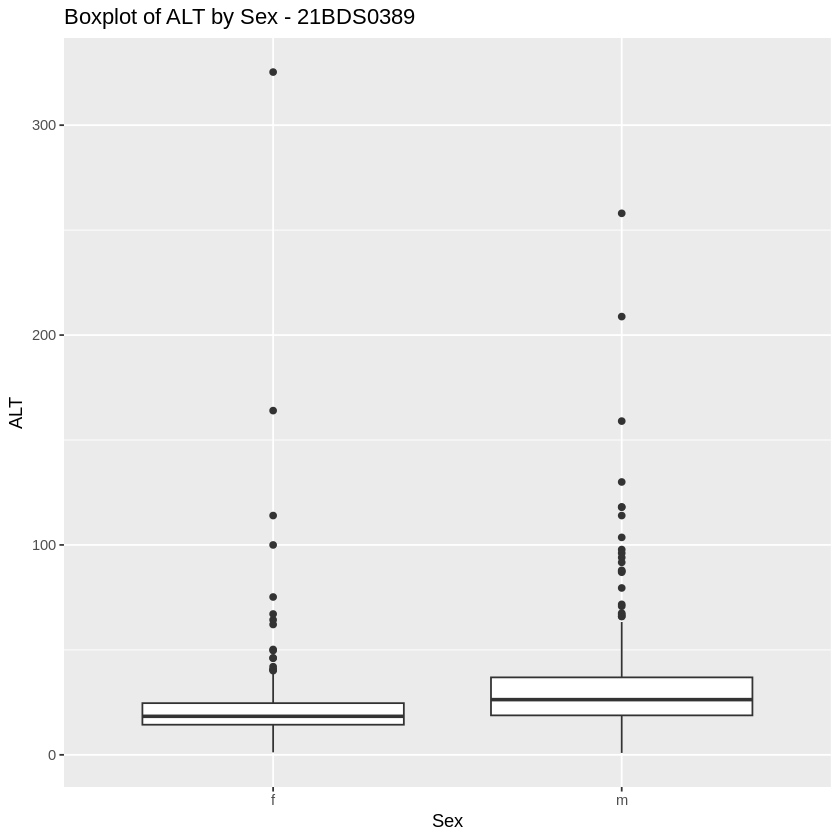

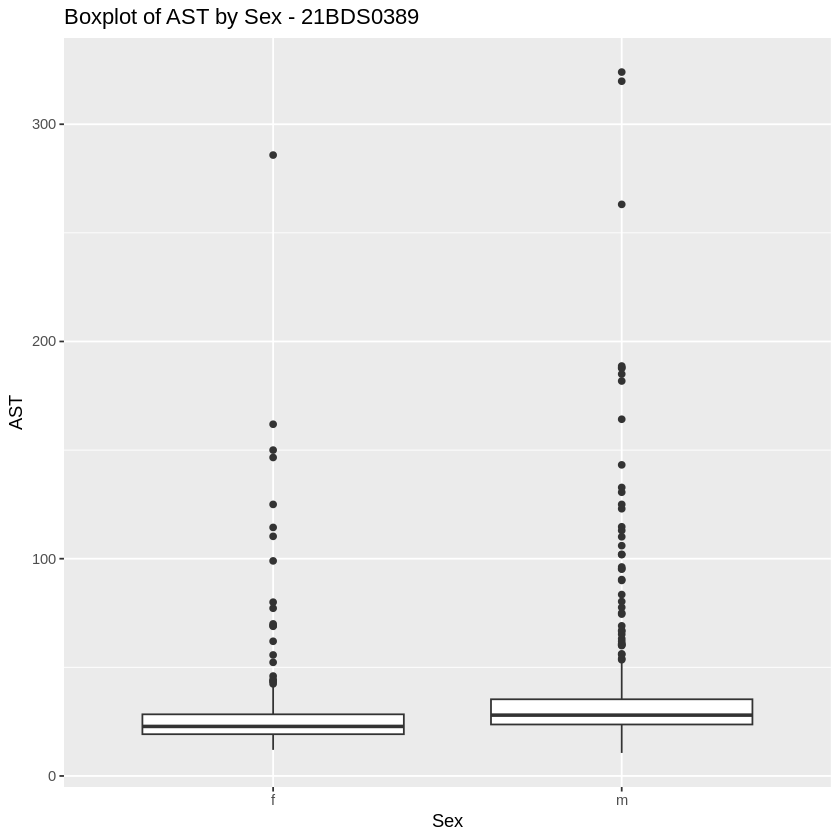

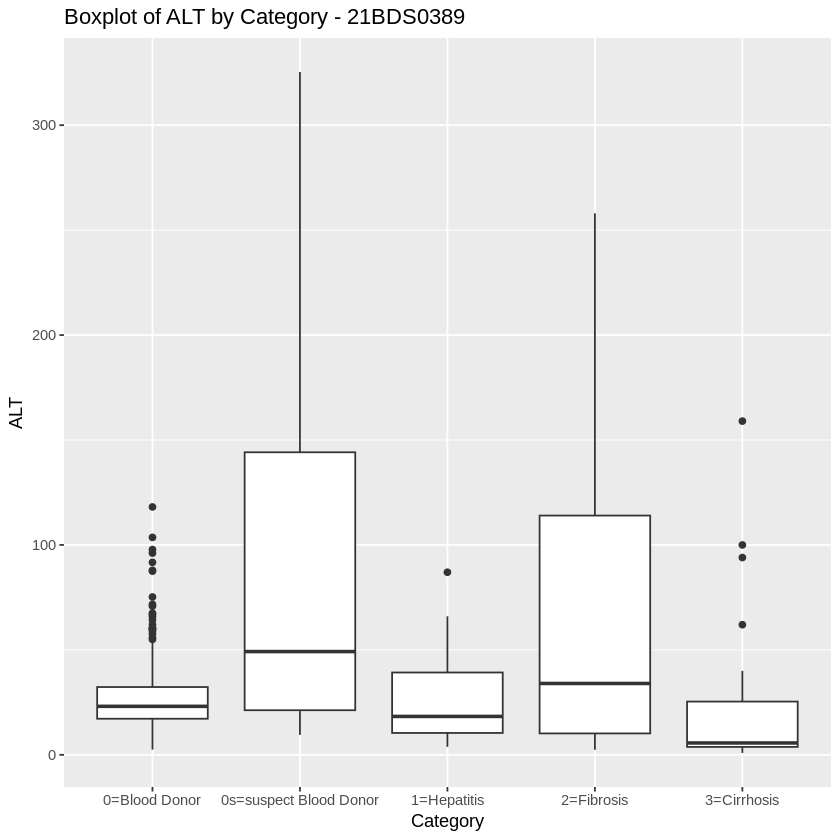

Category,ALT,AST
<chr>,<dbl>,<dbl>
0=Blood Donor,26.63152,26.54916
0s=suspect Blood Donor,102.11429,71.00000
1=Hepatitis,26.96462,75.73333
2=Fibrosis,59.60000,81.17143
3=Cirrhosis,22.97000,107.45667


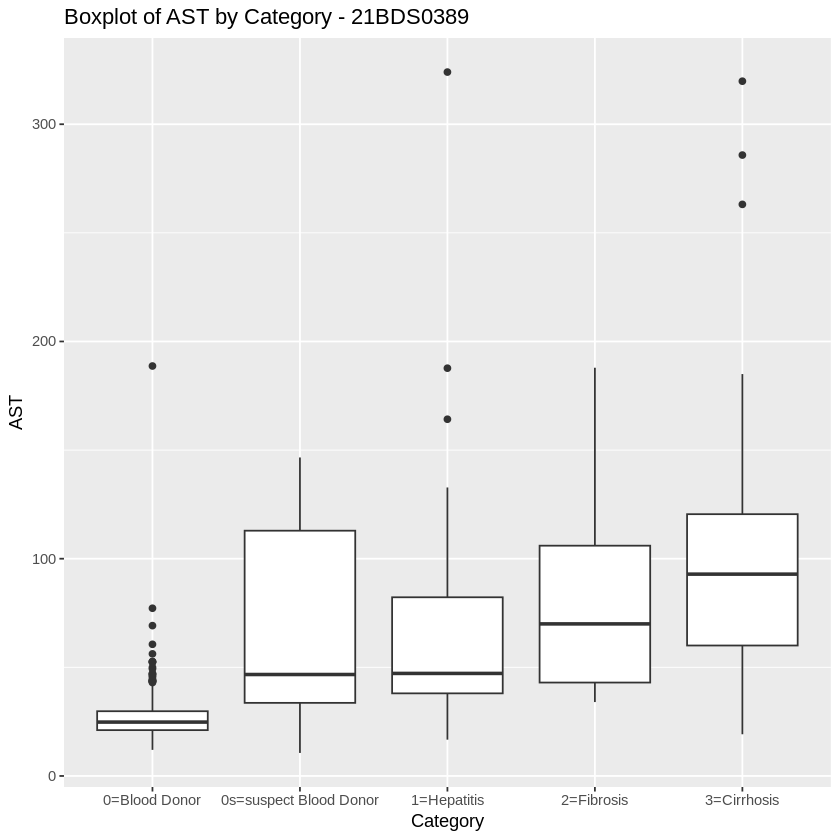

In [29]:
# Boxplot: Numeric vs Categorical (Sex)
ggplot(data_cleaned, aes(x=Sex, y=ALT)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALT by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=AST)) +
  geom_boxplot() +
  ggtitle("Boxplot of AST by Sex - 21BDS0389")

# Boxplot: Numeric vs Categorical (Category)
ggplot(data_cleaned, aes(x=Category, y=ALT)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALT by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=AST)) +
  geom_boxplot() +
  ggtitle("Boxplot of AST by Category - 21BDS0389")

# Group statistics: Mean ALT and AST by Category
aggregate(cbind(ALT, AST) ~ Category, data=data_cleaned, FUN=mean, na.rm=TRUE)

##### Categorical vs Categorical: Contingency Tables and Chi-square Test

In [30]:
# Contingency table for Sex and Category
table_sex_category <- table(data_cleaned$Sex, data_cleaned$Category)
print(table_sex_category)

# Perform Chi-square test to test independence between Sex and Category
chisq_test <- chisq.test(table_sex_category)
print(chisq_test)

   
    0=Blood Donor 0s=suspect Blood Donor 1=Hepatitis 2=Fibrosis 3=Cirrhosis
  f           215                      1           4          8          10
  m           318                      6          20         13          20


Warning message in chisq.test(table_sex_category):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_sex_category
X-squared = 7.6402, df = 4, p-value = 0.1057



### Multivariate Analysis

##### Correlation Matrix for Numeric Variables

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.94 loaded



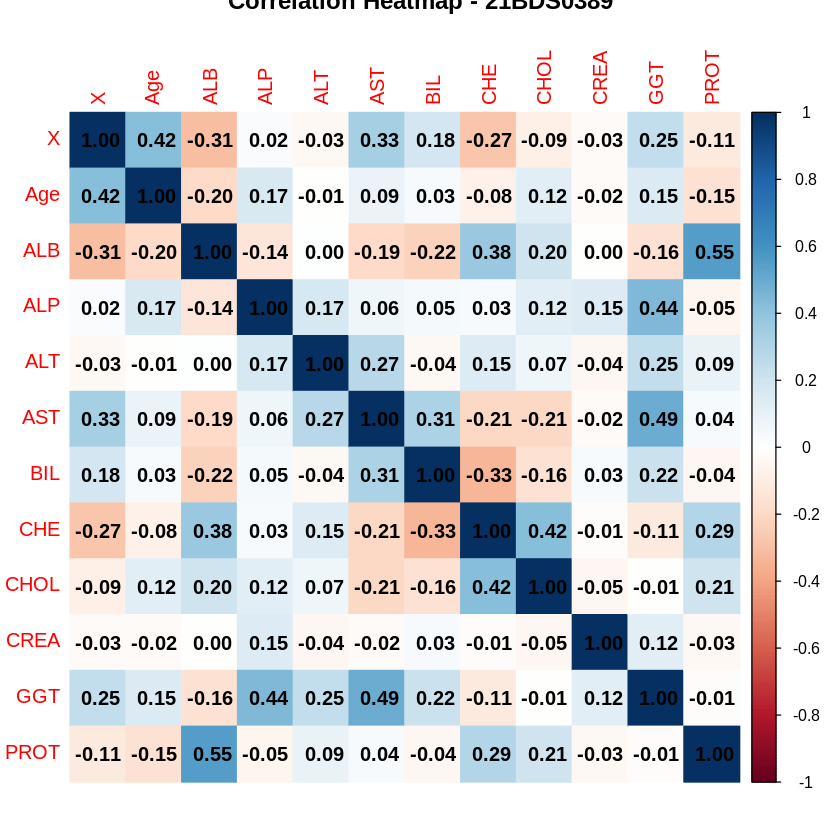

In [32]:
# Correlation matrix heatmap
install.packages("corrplot")
library(corrplot)

# Correlation matrix
cor_matrix <- cor(numeric_data, use="complete.obs")

# Heatmap for correlation matrix
corrplot(cor_matrix, method = "color", title="Correlation Heatmap - 21BDS0389", addCoef.col = "black")

###### Multivariate Linear Regression

In [33]:
# Multivariate linear regression to predict ALT using Age, AST, and BIL
lm_model <- lm(ALT ~ Age + AST + BIL, data = data_cleaned)
summary(lm_model)

# Multivariate regression predicting AST using multiple predictors
lm_model_ast <- lm(AST ~ Age + ALT + GGT + BIL, data = data_cleaned)
summary(lm_model_ast)


Call:
lm(formula = ALT ~ Age + AST + BIL, data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.133  -9.906  -4.122   4.488 269.517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.52217    4.77351   5.347 1.27e-07 ***
Age         -0.07549    0.09792  -0.771 0.441058    
AST          0.24514    0.03130   7.831 2.15e-14 ***
BIL         -0.17725    0.05248  -3.378 0.000777 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.3 on 611 degrees of freedom
Multiple R-squared:  0.09257,	Adjusted R-squared:  0.08812 
F-statistic: 20.78 on 3 and 611 DF,  p-value: 7.887e-13



Call:
lm(formula = AST ~ Age + ALT + GGT + BIL, data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.054  -7.823  -3.424   0.568 264.251 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.60443    5.52626   1.919   0.0555 .  
Age          0.07343    0.11149   0.659   0.5104    
ALT          0.24110    0.04515   5.340 1.31e-07 ***
GGT          0.23677    0.02176  10.879  < 2e-16 ***
BIL          0.39319    0.05790   6.791 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.42 on 610 degrees of freedom
Multiple R-squared:  0.3178,	Adjusted R-squared:  0.3133 
F-statistic: 71.04 on 4 and 610 DF,  p-value: < 2.2e-16


##### Scatter Plot Matrix for Multiple Numeric Variables

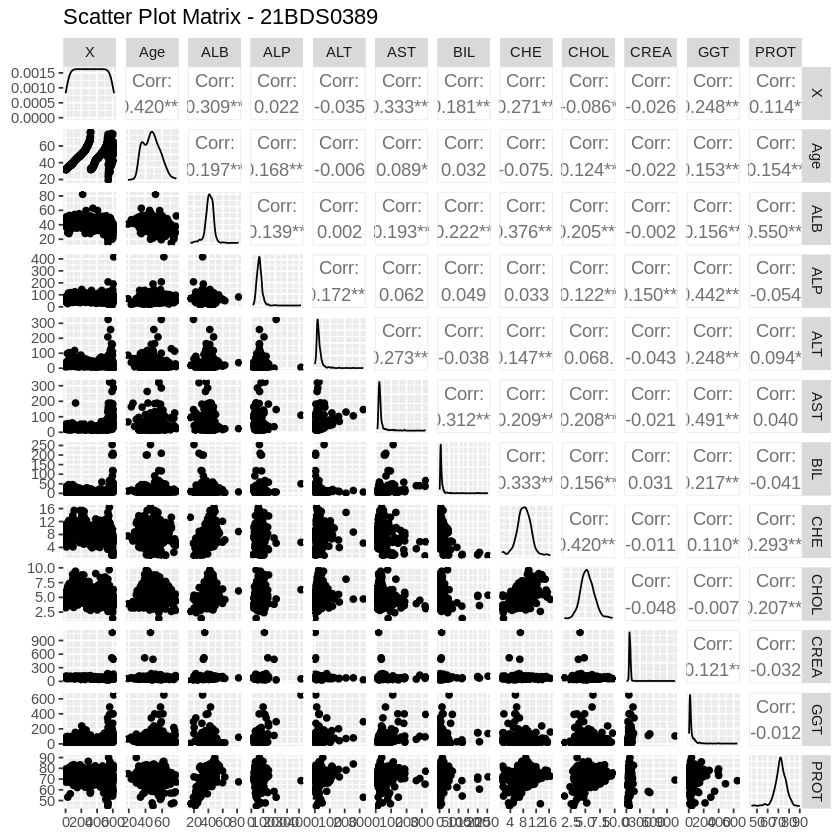

In [34]:
# Scatter plot matrix for multiple numeric variables
ggpairs(numeric_data, title = "Scatter Plot Matrix - 21BDS0389")

##### Multivariate Clustering

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“argument title is deprecated; please use main instead.”


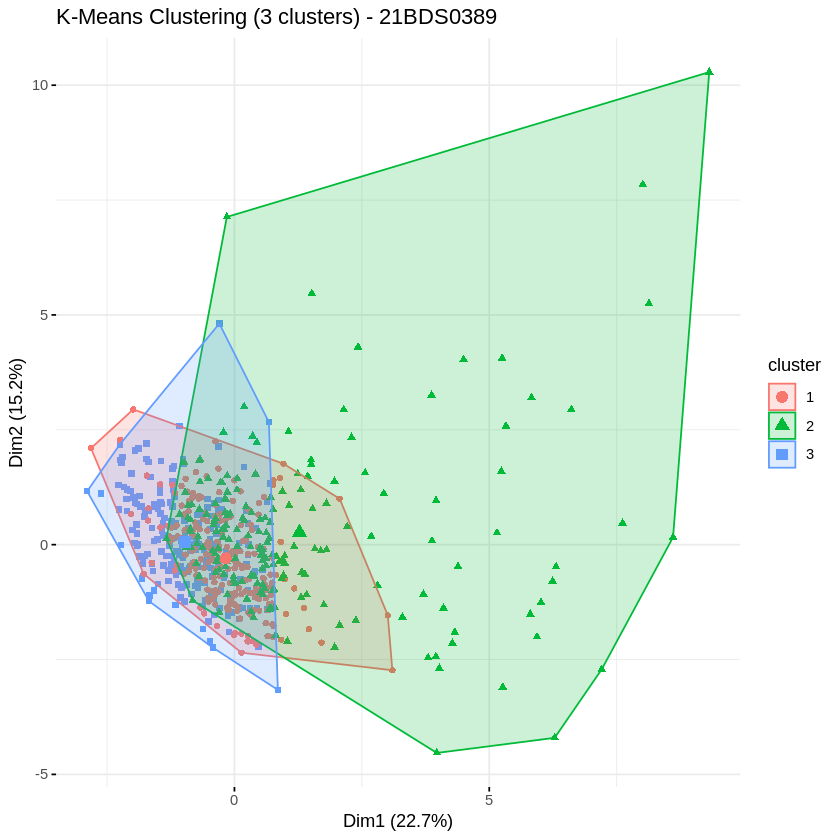

In [35]:
# Load required libraries
install.packages("cluster")
install.packages("factoextra")
library(cluster)
library(factoextra)

# Perform K-means clustering on numeric data
kmeans_result <- kmeans(numeric_data, centers=3, nstart=25)

# Visualize the clustering using PCA
fviz_cluster(kmeans_result, data = numeric_data, geom = "point", stand = TRUE,
             ellipse.type = "convex", ggtheme = theme_minimal(),
             title = "K-Means Clustering (3 clusters) - 21BDS0389")

##### Pairwise Scatter Plots

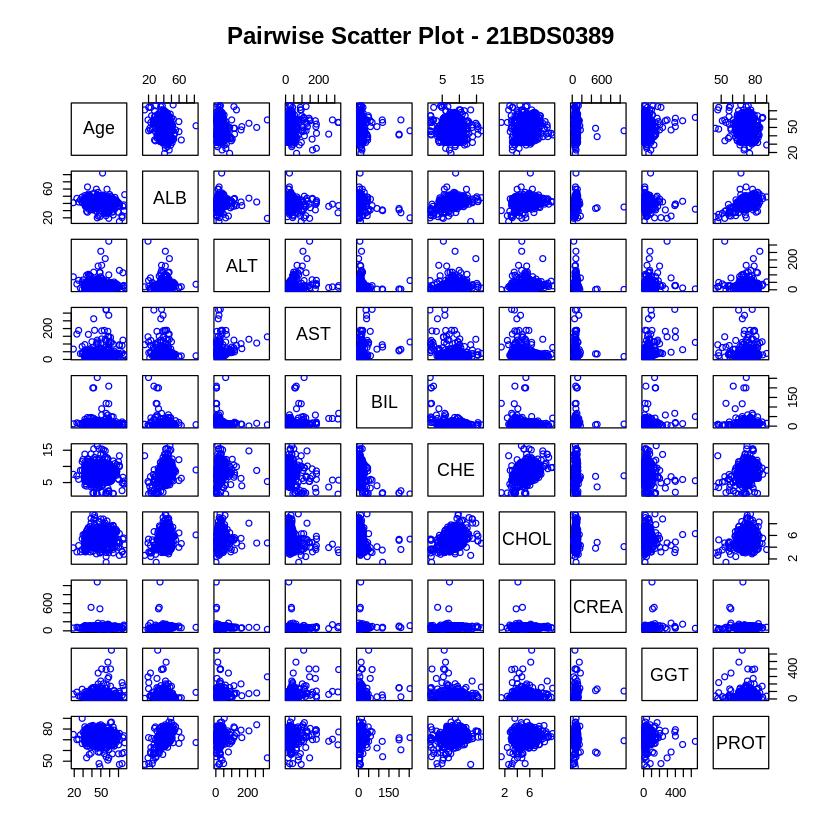

In [37]:
# Pairwise scatter plots between all numeric variables
pairs(data_cleaned[, c("Age", "ALB", "ALT", "AST", "BIL","CHE", "CHOL", "CREA", "GGT", "PROT")], main="Pairwise Scatter Plot - 21BDS0389", col="blue")

##### Heatmap for Correlation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



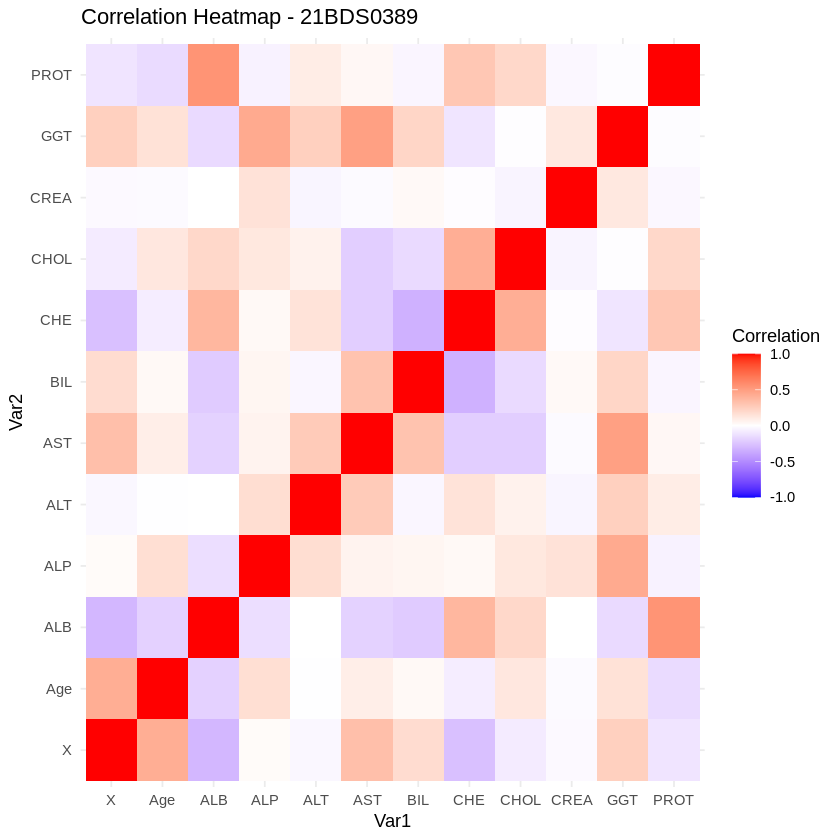

In [38]:
# Heatmap of correlation matrix
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Melt the correlation matrix into long format for ggplot
melted_cor <- melt(cor_matrix)

# Heatmap plot
ggplot(melted_cor, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0, limit=c(-1,1), name="Correlation") +
  theme_minimal() +
  ggtitle("Correlation Heatmap - 21BDS0389")